# Исследование объявлений о продаже квартир

**Цель:**

Найти параметры на основе которых формируется рыночная стоимость объектов недвижимости. 

**Задача:**

Установить параметры, которые позволят построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

**План работы**
- Выгрузить данные из файла и изучить общую информацию о датафрейме;
- Найти, изучить пропуски в данных, понять причину их возникновения, и заменить пропуски, если это возможно;
- Проверить, есть ли несоответствие типов данных в столбцах таблицы, если есть, то преобразовать типы на соответствующие;
- Провести поиск явных и неявных дубликатов, удалить дубликаты если они есть, также устранить неявные дубликаты;
- Проанализировать данные с использованием графиков и диаграмм, проверить реалистичность данных;
- Скорректировать данные, если в них ошибка или пропущена запятая;
- Удалить аномальные значения из таблицы;
- Добавить в таблицу новые столбцы, необходимые для исследования;
- Провести исследовательский анализ, который поможет нам научиться определять рыночную стоимость квартир, какие факторы влияют на стоимость объектов недвижимости;
- Сделать общий вывод с описанием полученых результатов исследования.

### Откроем файл с данными и изучем информацию

Импортируем необходимые для работы библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Считаем данные из файла и выведем на экран первые 10 строк таблицы.

In [2]:
data = pd.read_csv('dataset/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем основную информацию о таблице и построим гистограммы для проверки наличия аномальных значений в столбцах, хранящих числовые данные.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

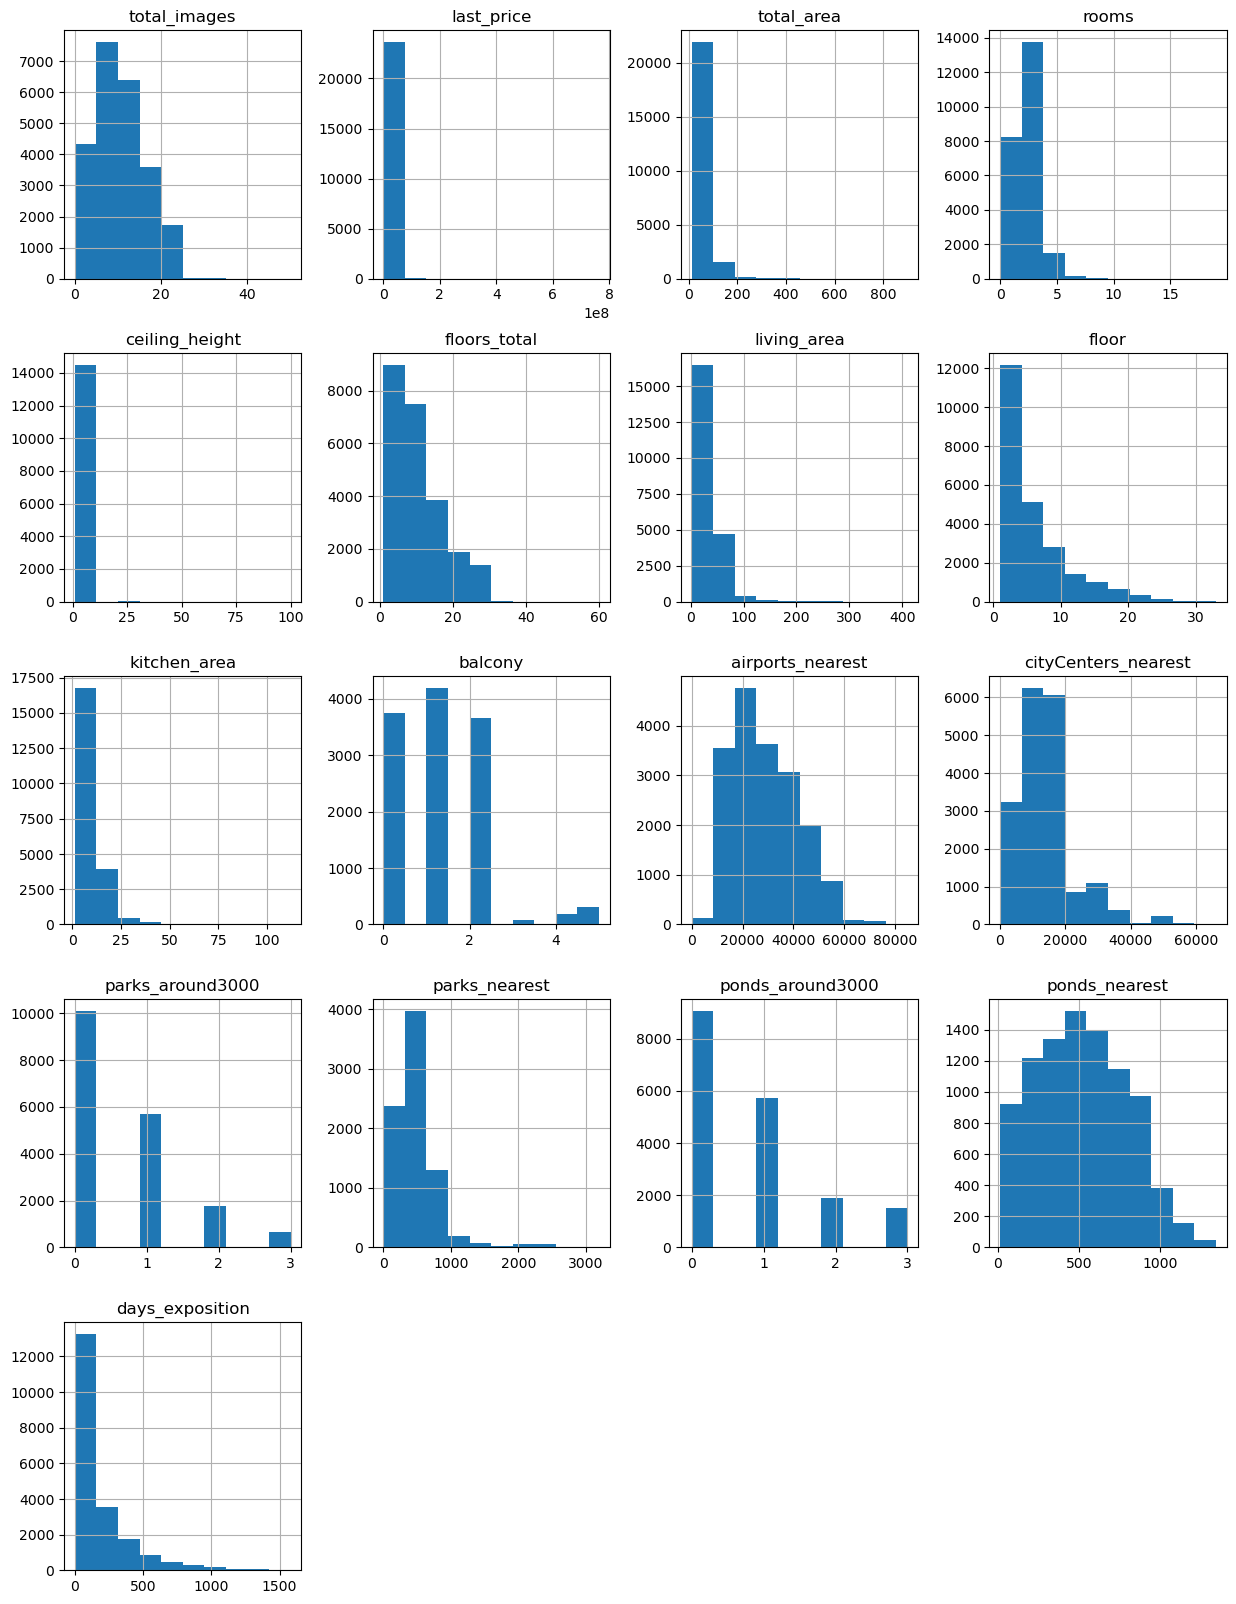

In [4]:
data.hist(grid=True, figsize=(15, 20))
plt.show()

При первичном изучении информации о датафрейме, можно заметить:

- в столбцах разное количество ненулевых элементов, а значит есть пропущенные значения;
- присутствуют аномальные значения;
- есть несоответствия типов данных в столбцах.

### Предобработка данных

In [5]:
#Прежде чем проводить предобработку данных, запомним количество строк исходной таблицы
#Для проверки в будущем % удаленных данных 
data_len = len(data)
print('Количество строк до удаления аномальных значений:', data_len)

Количество строк до удаления аномальных значений: 23699


In [6]:
#Заменем название столбца на 'snakecase' 
data = data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'})

In [7]:
#Найдем количество пропусков в столбцах
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Как видно из выведенных на экран данных, в некоторых столбцах есть большое количество пропусков.

**Основными причинами пропусков могут являться:**

- Пользователь сам не внес некоторые из данных, такие как: название населенного пункта, площади жилых и кухонных зон, высоту потолков, количество этажей в доме, является ли жилье апартаментами, количество балконов или их отсутствие;
- Некоторые данные заполнялись автоматически на основе картографических данных: ближайший аэропорт, расстояние до центра, ближайшие парки, ближайшие водоемы; при этом возникли пропуски по разным причинам, например, недостатка информации, если отсутствует название населенного пункта или в названии населенного пункта ошибка, невозможно просчитать расстояние от него до других близлежащих мест, также на информацию в данных столбцах может влиять то, что в населенном пункте вообще отсутствуют аэропорты, парки или водоемы;
- Пропуски в столбце 'days_exposition' могут быть по нескольким причинам: при выставлении объявления в первый день данное поле имеет значение NaN; объявление уже снято с продажи и/или сделка продажи не совершилась; объявление только выложили и сразу закрыли.



In [8]:
#Заменим пустые значения в столбце 'ceiling_height' медианным значением данного столбца - высоты потолков 
data['ceiling_height'] = data['ceiling_height'].fillna(value=data['ceiling_height'].median())

In [9]:
#Заполним пропуски в 'is_apartment'
#Пропуски в данном столбце зависят от значений столбцов 'studio', 'open_plan'. 
#Если в них False, то в 'is_apartment' доавим True и наоборот
for i in data['is_apartment'].unique():   
    data.loc[(data['is_apartment'].isna()) & ((data['studio'] == i) & (data['studio'] == False)) & \
             ((data['open_plan'] == i) & (data['open_plan'] == False)), 'is_apartment'] = True
    data.loc[(data['is_apartment'].isna()) & ((data['studio'] == i) & (data['studio'] == True)) | \
             ((data['open_plan'] == i) & (data['open_plan'] == True)), 'is_apartment'] = False

In [10]:
#Найдем долю, которую в среднем занимает кухня от всей площади квартиры
kitchen_area_median = (data['kitchen_area'] / data['total_area']).median()
kitchen_area_median

0.1724137931034483

In [11]:
#Найдем долю, которую в среднем занимает жилая площадь от всей площади квартиры
living_area_median = (data['living_area'] / data['total_area']).median()
living_area_median

0.5678598992678503

In [12]:
#Заполним пропуски в 'kitchen_area'
for i in data['kitchen_area'].isna():
    data.loc[(~data['total_area'].isna()) & (data['kitchen_area'].isna()),\
             'kitchen_area'] = data['total_area'] * kitchen_area_median 

In [13]:
#Заполним пропуски в 'living_area'
for i in data['living_area'].isna():
    data.loc[(~data['total_area'].isna()) & (data['living_area'].isna()),\
             'living_area'] = data['total_area'] * living_area_median 

In [14]:
#Округлим значения в столбцах с площадями до 2 символов после запятой
data['kitchen_area'].round(2)
data['living_area'].round(2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,True,...,25.000000,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,True,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,True,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,90.289724,9,True,...,27.413793,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,True,...,41.000000,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [15]:
#Заполняем пропуски в 'balcony' и 'days_exposition' на 0 значения
data['balcony'] = data['balcony'].fillna(value=0)
data['days_exposition'] = data['days_exposition'].fillna(value=0)

#Удаляем пропуски в 'locality_name' и 'floors_total' так как их незначительное количество

data = data.dropna(subset=['locality_name'])
data = data.dropna(subset=['floors_total'])

#Проверим: остались ли пустые значения в заполненных нами столбцах.
print('Проверяем как изменились пустые значения:\n', data.isna().sum())

Проверяем как изменились пустые значения:
 total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition             0
dtype: int64


При работе с датафреймом было выявлено большое количество пропущенных значений в разных столбцах.

**Часть пропусков в таблице удалось заполнить:**

- В столбце ceiling_height пустые значения были заменены на медианное значение потолков в квартирах;
- В столбце is_apartment замена пропусков производилась следующим образом: проверялось, не является ли эта квартира студией или свободной планировкой, то есть в столбцах studio и open_plan соответствующей строки было значение False, тогда эта квартира становится апартаментами;
- В столбце balcony пропущенные значения были заменены на 0, так как скорее всего в этих квартирах отсутствует балкон;
- В столбце days_exposition пропущенные значения были заменены на 0, так как скорее всего пропуски в этом столбце связаны с публикацией объявления в этот же день или закрытием объявления в этот же день, поэтому количество дней, в течении которых объявление было на площадке, равно 0;
- В столбцах locality_name и floors_total очень маленький процент пропусков, поэтому их можно удалить;
- Для столбцов kitchen_area и living_area были найдены доли (которые эти площади в среднем занимают от всей площади квартиры) и заполнены пропуски произведением площади квартиры на долю, которую занимает площадь кухни или жилая площадь.

**Часть пропусков было решено оставить:**

- В столбцах относящихся к расстоянию до ближайших мест проведения досуга и аэропортов: airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest порпуски было решено оставить, так как эти расстояния заполнялись автоматически на основании картографических данных, и у нас недостаточно информации, чтобы корректно заполнить данные пропуски. Также, можно предположить, что одной из причин таких пропусков может являться большое количество дубликатов, тогда автоматически заполнить поля значениями было сложно. Возможно, эти столбцы можно заполнить средними значениями по одинаковым населенным пунктам, так как эти столбцы связаны именно со столбцом locality_name, но после удаления дубликатов.



In [16]:
#Проверяем типы данных 
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [17]:
#Функция меняет тип в столбцах
def change_columns_type(column_name, to_type):
    data[column_name] = data[column_name].astype(to_type)

change_columns_type('is_apartment', bool)
change_columns_type('balcony', int)
change_columns_type('last_price', int)
change_columns_type('floors_total', int)

In [18]:
#Меняем тип даты публикации
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#Проверяем как поменялись типы
print('Типы данных после изменения:\n', data.dtypes)

Типы данных после изменения:
 total_images                     int64
last_price                       int32
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int32
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object


In [19]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,True,...,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,True,...,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.289724,9,True,...,27.413793,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


- В столбце is_apartment тип object был заменен на булевый тип, так как это столбец со значениями True и False и содержит информацию о том, является ли квартира апартаментами или нет;
- В столбце balcony вещественный тип был заменен на целочисленный, потому что количество балконов не может быть вещественным числом;
- В столбце last_price вещественный тип был заменен на целочисленный, так как цена указана большими суммами без копеек.
- В столбце first_day_exposition тип был изменен на datetime



In [20]:
#Проверим уникальные значения столбцов
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [21]:
len(data['locality_name'].unique())

364

In [22]:
#Заменим неявные дубликаты
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')       
data['locality_name'] = data['locality_name'].str.replace('деревня Кудрово', 'Кудрово')
data['locality_name'] = data['locality_name'].str.replace('поселок Коммунары', 'Коммунар')
data['locality_name'] = data['locality_name'].str.replace('деревня Фёдоровское', 'городской поселок Фёдоровское')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа Кузьмоловский', 'деревня Кузьмолово')
data['locality_name'] = data['locality_name'].replace(['село Павлово', 'поселок городского типа Павлово'],
                                                      'городской поселок Павлово', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок Кингисеппский', 'Кингисепп')
data['locality_name'] = data['locality_name'].replace(['Никольское', 'поселок городского типа Никольский'],
                                                      'село Никольское', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа Рощино', 'городской поселок Рощино')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа Советский',
                                                          'городской поселок Советский')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа Большая Ижора',
                                                          'городской поселок Большая Ижора')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа Лесогорский',
                                                          'городской поселок Лесогорский')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество Рахья', 'городской поселок Рахья')
data['locality_name'] = data['locality_name'].str.replace('деревня Зимитицы', 'поселок Зимитицы')
data['locality_name'] = data['locality_name'].str.replace('поселок Рябово', 'поселок городского типа Рябово')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа Мга', 'городской поселок Мга')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции Вещево',
                                                          'поселок станции Вещево')
data['locality_name'] = data['locality_name'].str.replace('деревня Калитино', 'поселок Калитино')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество Приладожский',
                                                          'поселок городского типа Приладожский')
data['locality_name'] = data['locality_name'].str.replace('деревня Щеглово', 'поселок Щеглово')
data['locality_name'] = data['locality_name'].str.replace('деревня Рабитицы', 'поселок Рабитицы')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа Назия', 'городской поселок Назия')
data['locality_name'] = data['locality_name'].str.replace('поселок Гарболово', 'деревня Гарболово')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции Приветнинское',
                                                          'поселок станции Приветнинское')
data['locality_name'] = data['locality_name'].str.replace('Любань', 'поселок Любань')
data['locality_name'] = data['locality_name'].str.replace('поселок станции Громово', 'поселок Громово')
data['locality_name'] = data['locality_name'].str.replace('коттеджный посёлок Лесное', 'поселок Лесное')

In [23]:
len(data['locality_name'].unique())

307

- Многие значения были записаны дважды: со значением "ё" и "е" в словах;
- У части населенных пунктов дублировались названия с разным типом населенного пункта ("деревня", "поселок" и тд)
- После замены неявных дубликатов, количество уникальных значений сократилось.

In [24]:
data.duplicated().sum()

0

- Полные дубликаты в таблице отсутствуют.

(-10.0, 720.0)

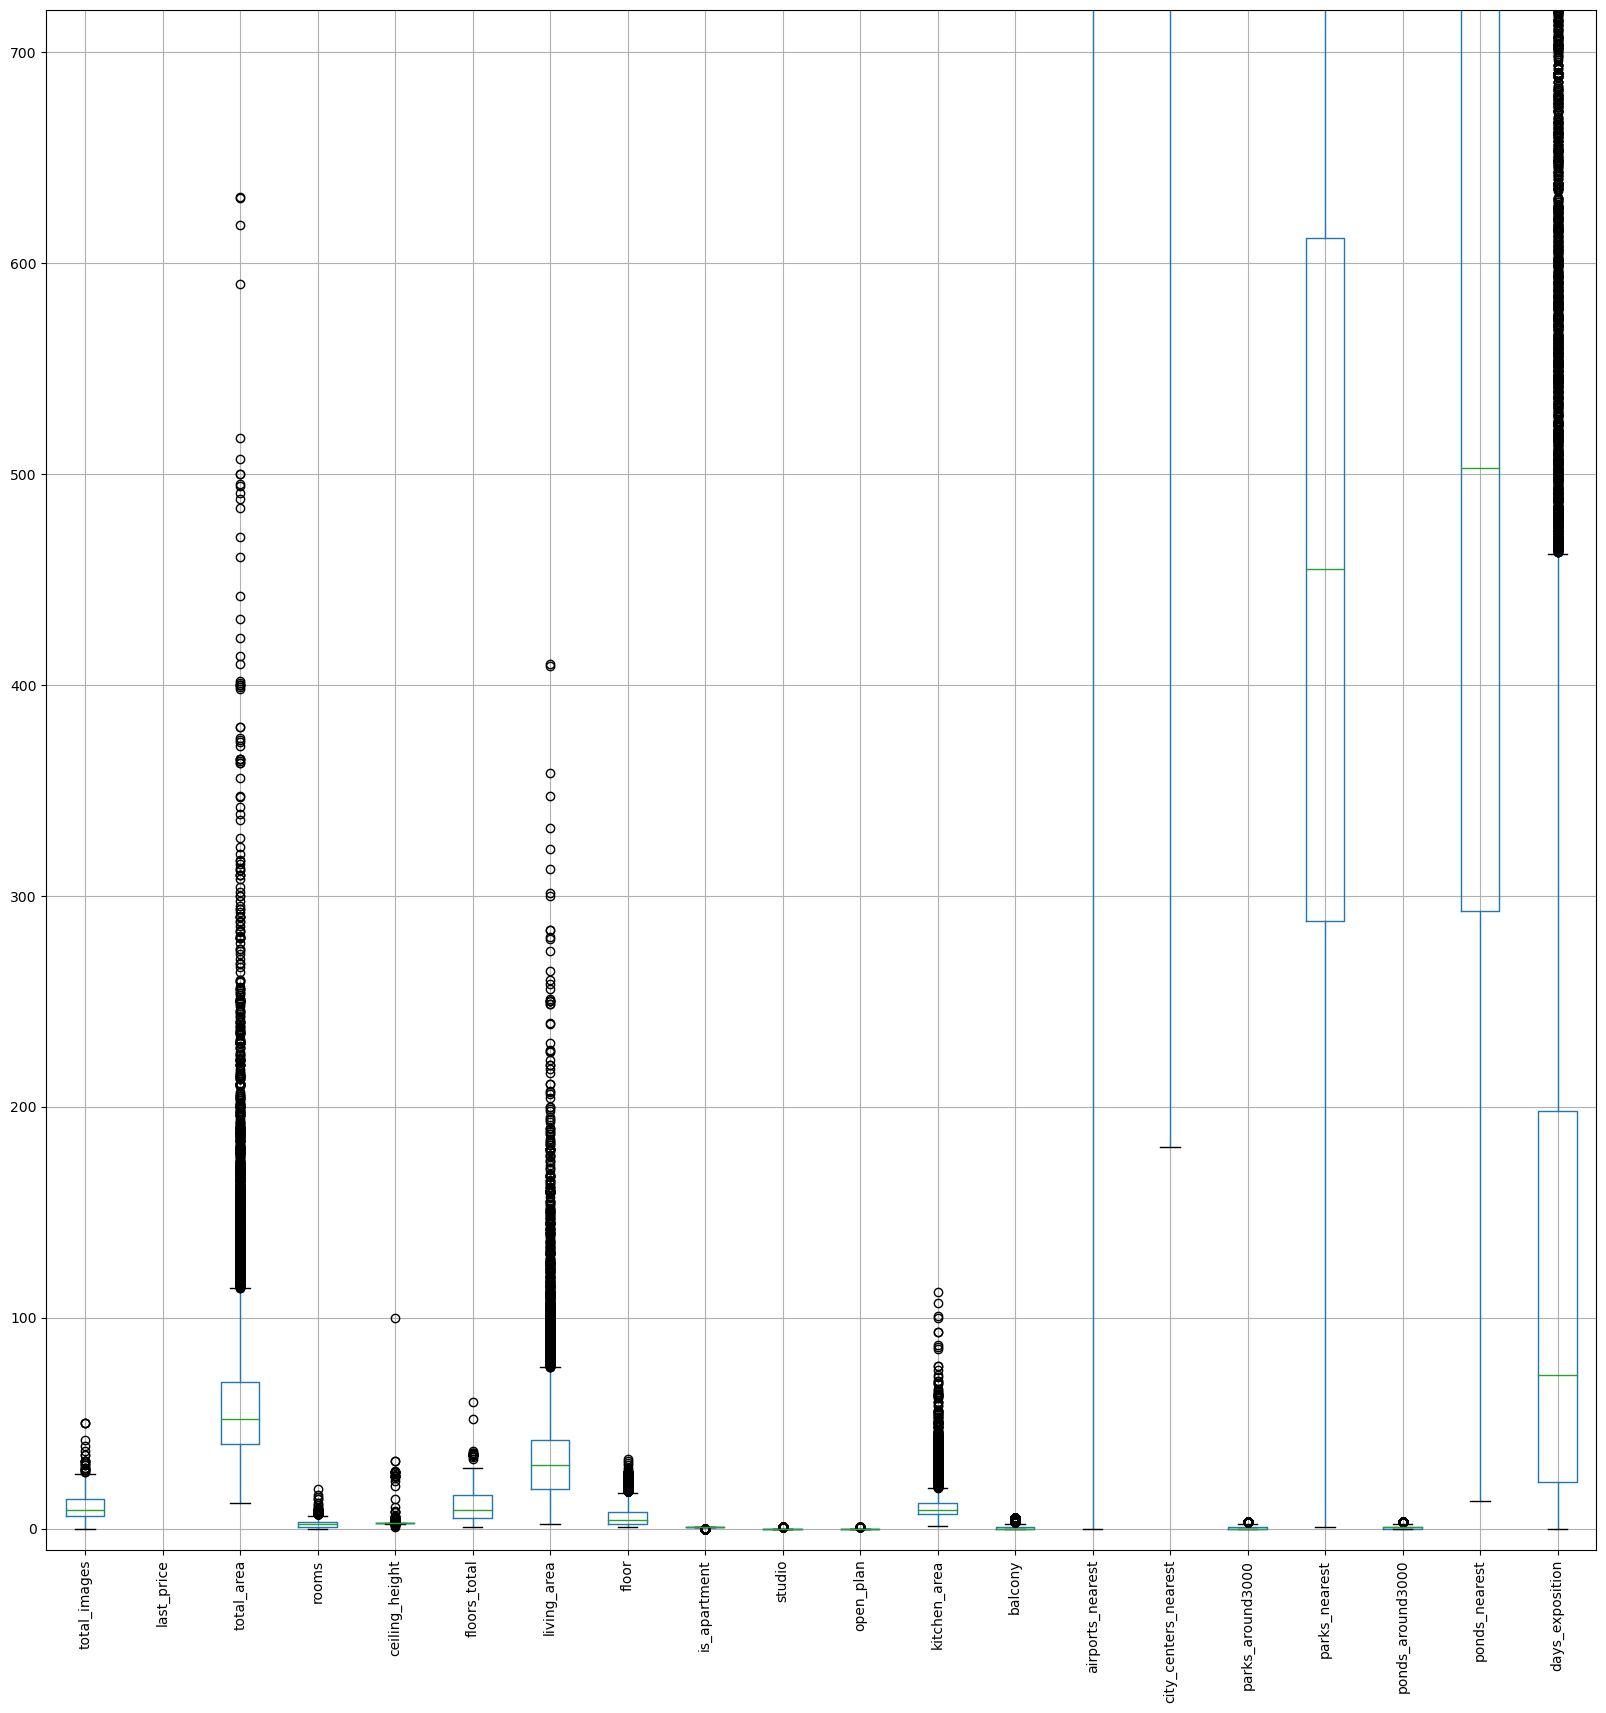

In [25]:
#Построим диаграмму размаха для оценки разброса минимальных и максимальных значений
data.boxplot(figsize=(20, 20), rot=90)
plt.ylim(-10, 720)

In [26]:
#Вызовем метод для оценки однородности значений
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,34.575658,5.878124,10.485692,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,156.420115
std,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,22.358897,4.871485,6.027080,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,213.517293
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,22.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,73.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


- На диаграмме размаха видно, что в большиенстве столбцов присутствуют аномальные значения;
- Максимальная и минимальная высоты потолков в столбце ceiling_height выглядят подозрительно, так как минимальное значение высоты потолка 1 метр, а максимальное 100 метров;
- В некоторых столбцах большое стандартное отклонение, значит значения в них сильно колеблются, например в столбце total_area, также и в других столбцах относящихся к площади living_area и kitchen_area есть аномальные значения.

Для некоторых из таких столбцов построим отдельно диаграмму размаха и обработаем ошибки, по которым могли получиться аномальные значения

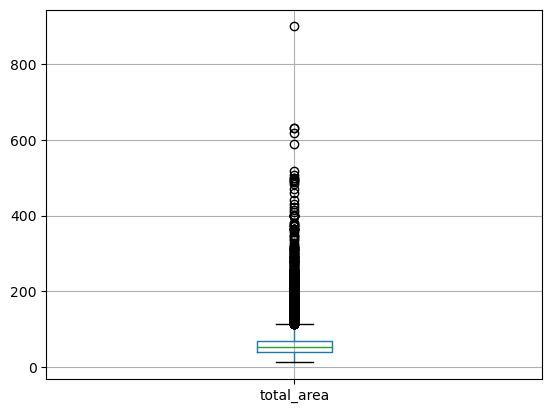

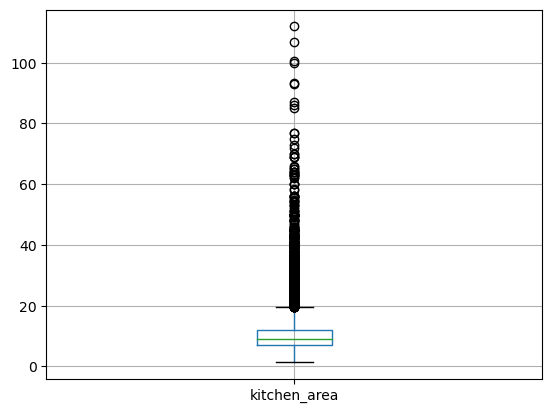

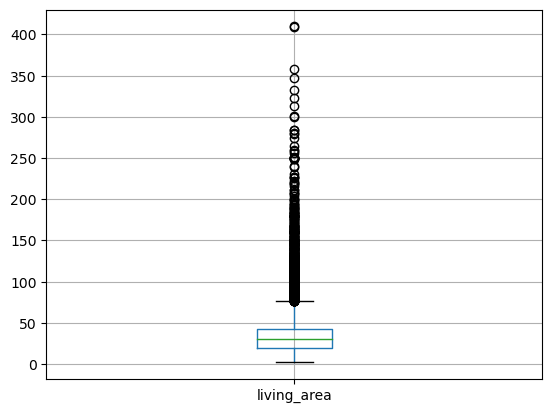

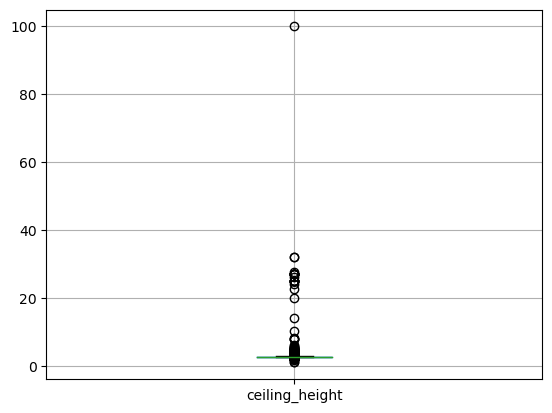

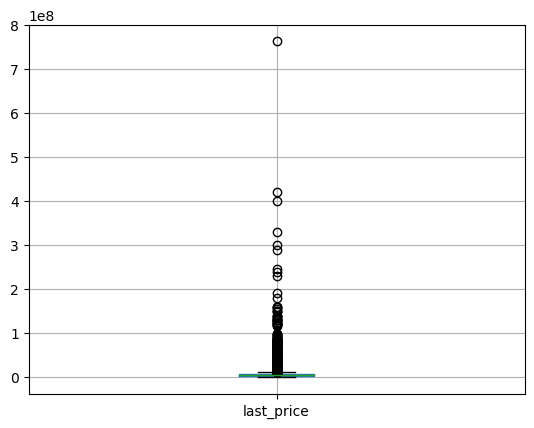

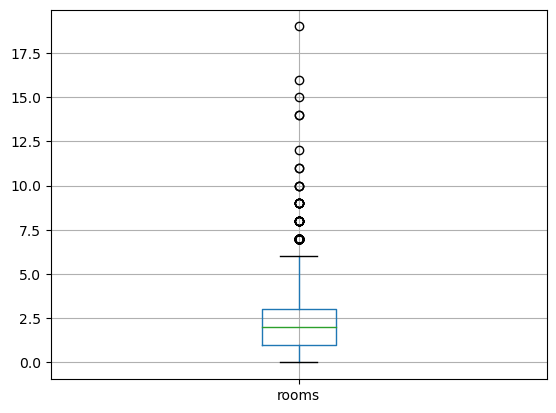

In [27]:
#Объявим функцию для построения отдельных графиков диаграммы размаха
def plot_boxplot(data_frame, column_name):
    data_frame.boxplot(column=[column_name])
    plt.grid(True)
    plt.show()
    
plot_boxplot(data, 'total_area')
plot_boxplot(data, 'kitchen_area')
plot_boxplot(data, 'living_area')
plot_boxplot(data, 'ceiling_height')
plot_boxplot(data, 'last_price')
plot_boxplot(data, 'rooms')

Построим гистограммы площадей квартир, кухонных зон, жилых зон, высот потолков и других данных в объектах недвижимостей, выставленных в объявлениях. Посмотрим, есть ли аномальные значения и нужно ли их заменять.

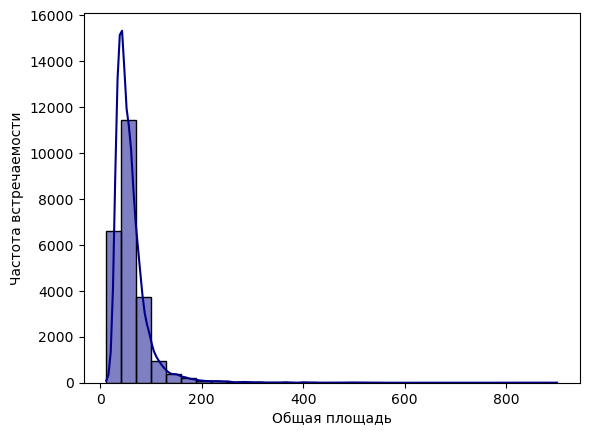

In [28]:
def data_histplot(column, x_label, y_label):
    sns.histplot(data[column], kde=True, bins=30, color = 'darkblue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
data_histplot('total_area', 'Общая площадь', 'Частота встречаемости')

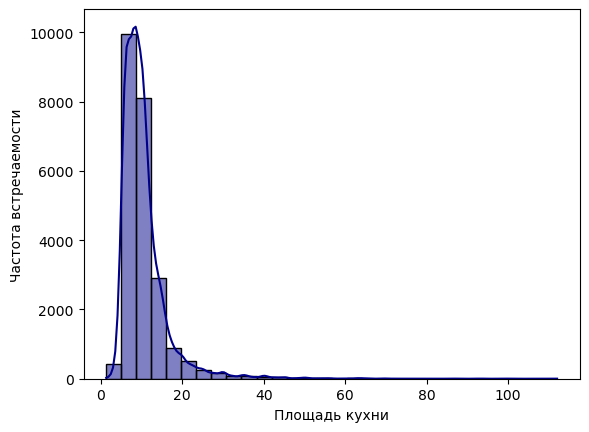

In [29]:
data_histplot('kitchen_area', 'Площадь кухни', 'Частота встречаемости')

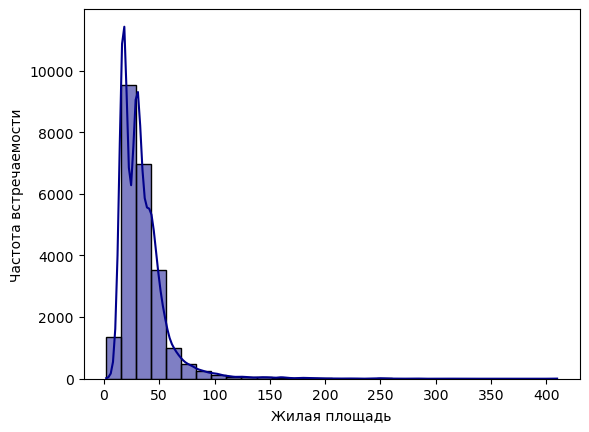

In [30]:
data_histplot('living_area', 'Жилая площадь', 'Частота встречаемости')

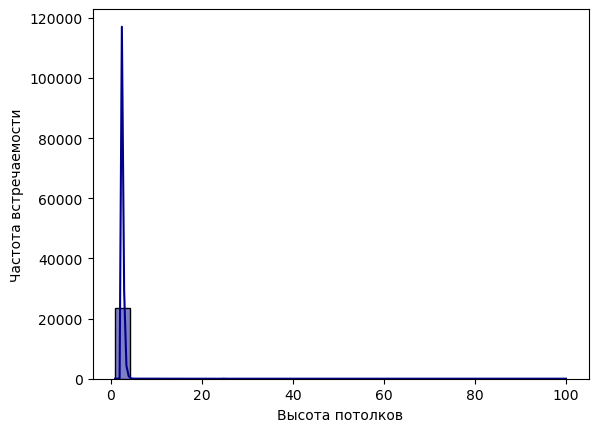

In [31]:
data_histplot('ceiling_height', 'Высота потолков', 'Частота встречаемости')

В столбце с высотой потолков есть аномальные значения. Аномальная высота потолков может свидетельствовать о том, что данные были внесены не корректно, возможно, при заполнении была пропущена запятая. Скорректируем значения.

In [32]:
data.loc[(data['ceiling_height'] >= 20), 'ceiling_height'] = (data['ceiling_height'] / 10)
data['ceiling_height']

0        2.70
1        2.65
2        2.65
3        2.65
4        3.03
         ... 
23694    3.70
23695    2.65
23696    2.65
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23565, dtype: float64

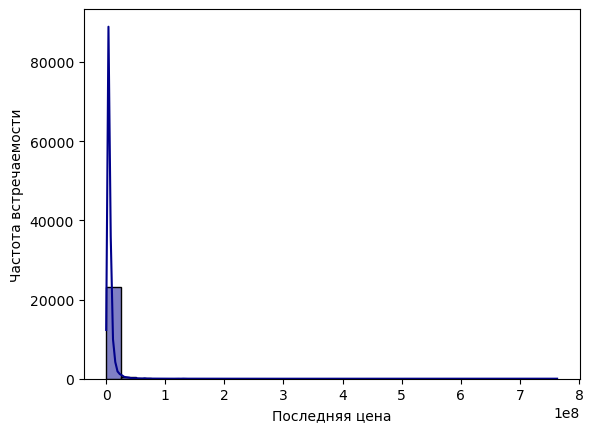

In [33]:
data_histplot('last_price', 'Последняя цена', 'Частота встречаемости')

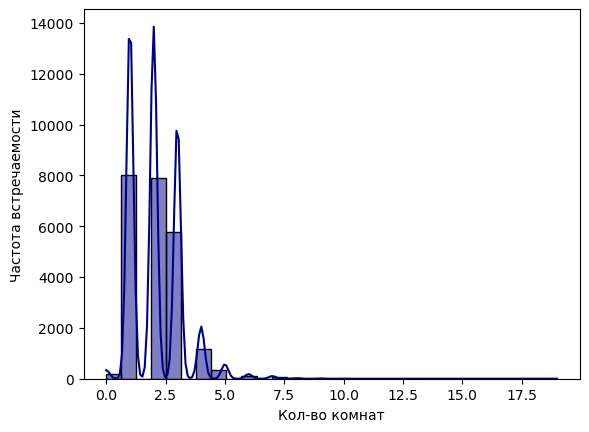

In [34]:
data_histplot('rooms', 'Кол-во комнат', 'Частота встречаемости')

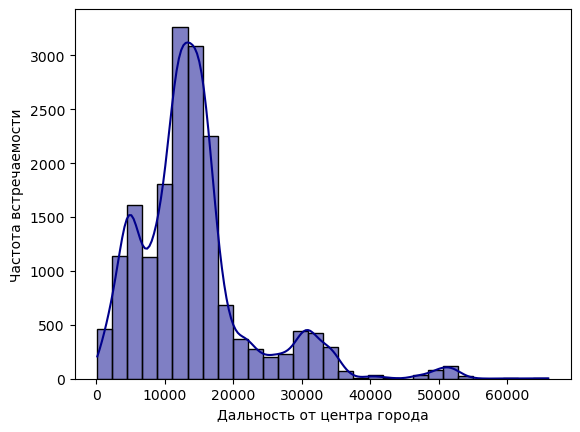

In [35]:
data_histplot('city_centers_nearest', 'Дальность от центра города', 'Частота встречаемости')

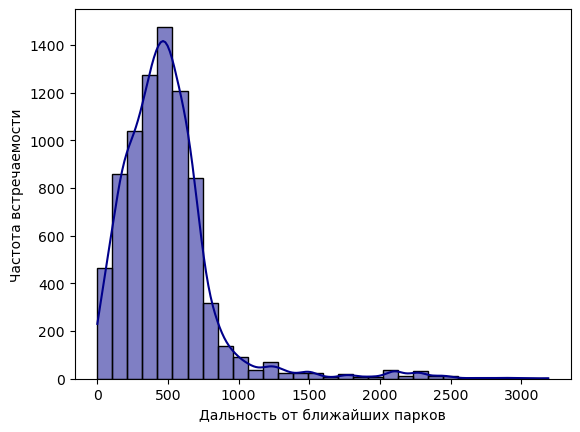

In [36]:
data_histplot('parks_nearest', 'Дальность от ближайших парков', 'Частота встречаемости')

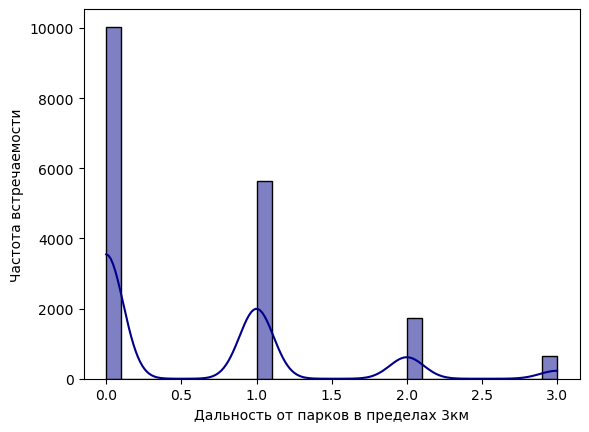

In [37]:
data_histplot('parks_around3000', 'Дальность от парков в пределах 3км', 'Частота встречаемости')

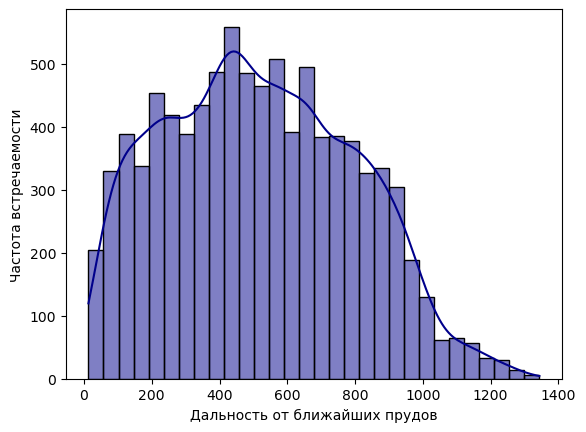

In [38]:
data_histplot('ponds_nearest', 'Дальность от ближайших прудов', 'Частота встречаемости')

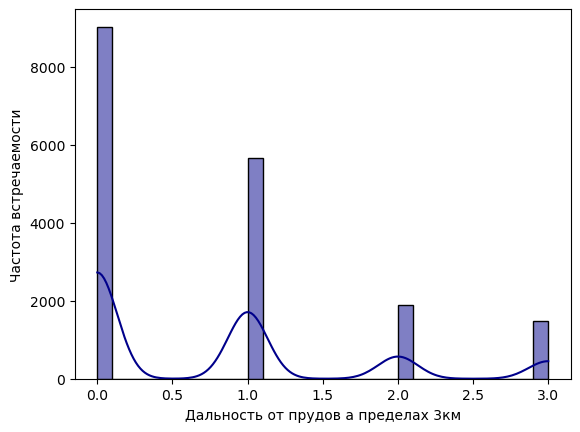

In [39]:
data_histplot('ponds_around3000', 'Дальность от прудов а пределах 3км', 'Частота встречаемости')

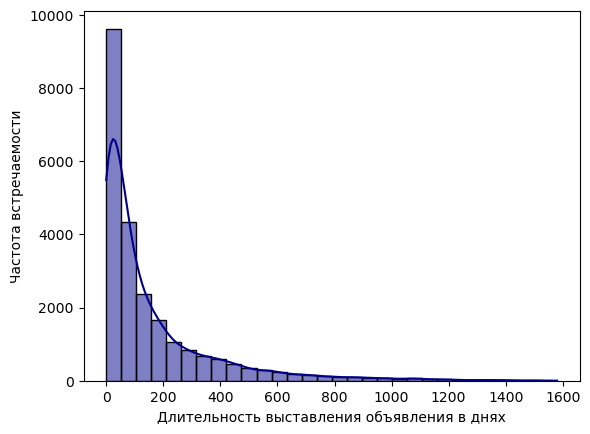

In [40]:
data_histplot('days_exposition', 'Длительность выставления объявления в днях', 'Частота встречаемости')

Выведем основные статистические характеристики данных таблицы.

In [41]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.698746,10.675875,34.575658,5.878124,10.485692,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,156.420115
std,5.681156,1.091093e+07,35.657060,1.078591,0.253630,6.594823,22.358897,4.871485,6.027080,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,213.517293
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,22.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,73.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,14.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Максимальные значения, стандартные отклонения, средние значения изменились в меньшую сторону, значит, ошибки в выбивающихся значениях были поправлены. Произошел также сдвиг значений квантилей. Ниже построим еще раз диаграмму размаха, чтобы посмотреть как сейчас выглядят данные из таблицы и сколько еще аномальных выбросов осталось, которые уже придется удалять а не заменять.

(-10.0, 720.0)

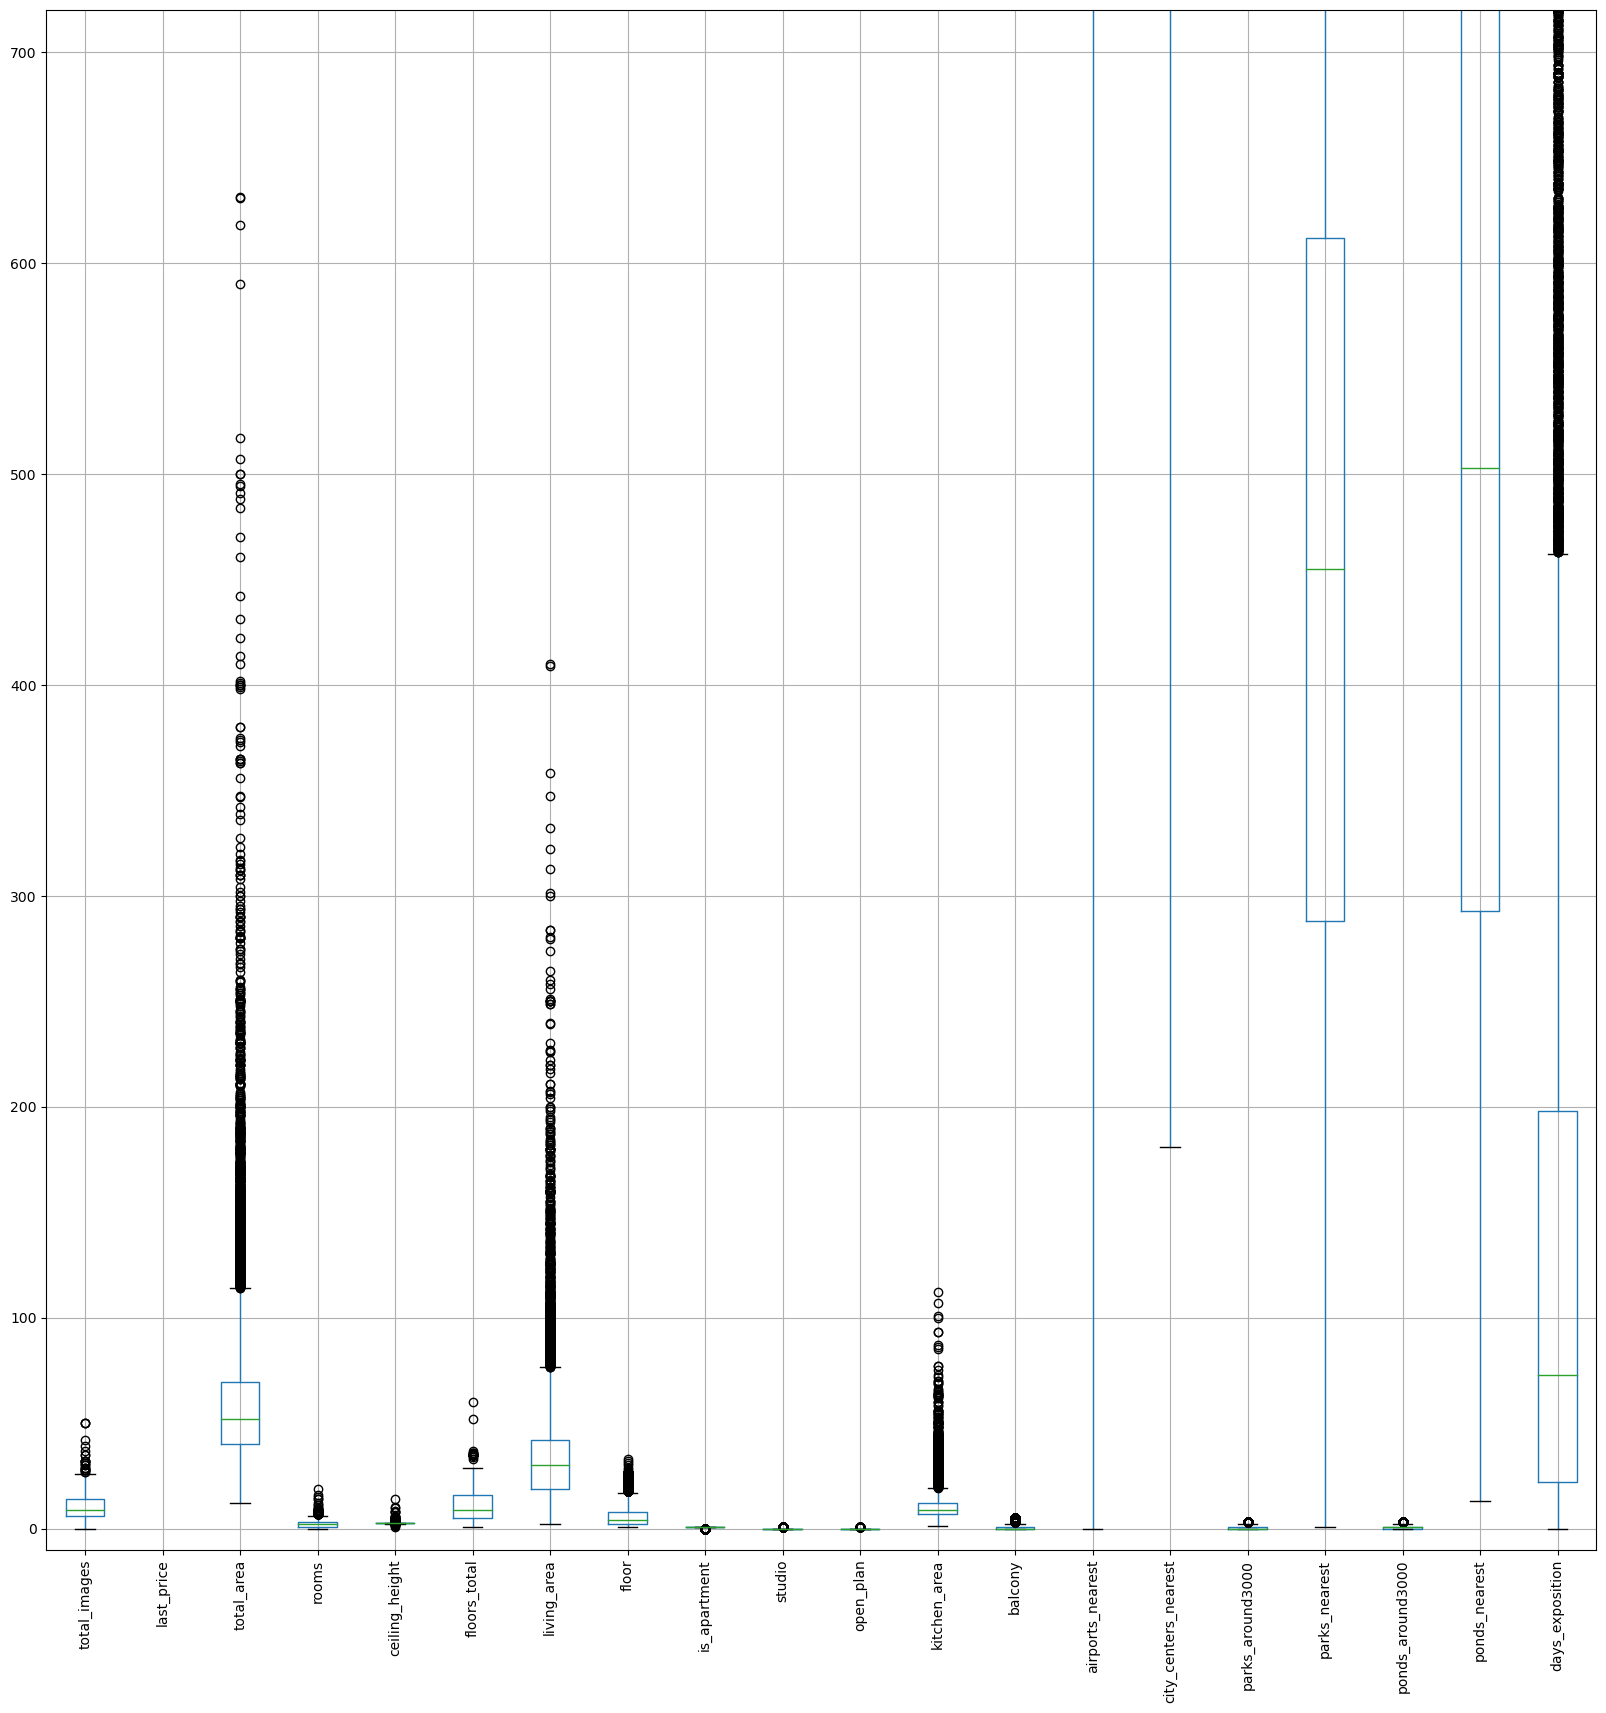

In [42]:
#Построим диаграмму размаха для оценки разброса минимальных и максимальных значений
data.boxplot(figsize=(20, 20), rot=90)
plt.ylim(-10, 720)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int32         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

Видно, что за 3 квартилью находится большое количество единичных значений, они будут мешать проведению анализа, поэтому необходимо избавиться от аномальных значений во всех столбцах.

In [44]:
#Сократим  единичные выбросы в следующих столбцах
data = data.query('total_area < 320')
data = data.query('kitchen_area < 70')
data = data.query('living_area < 200')
data = data.query('floors_total < 50')
data = data.query('total_images < 35')
data = data.query('ceiling_height < 10')

(-10.0, 720.0)

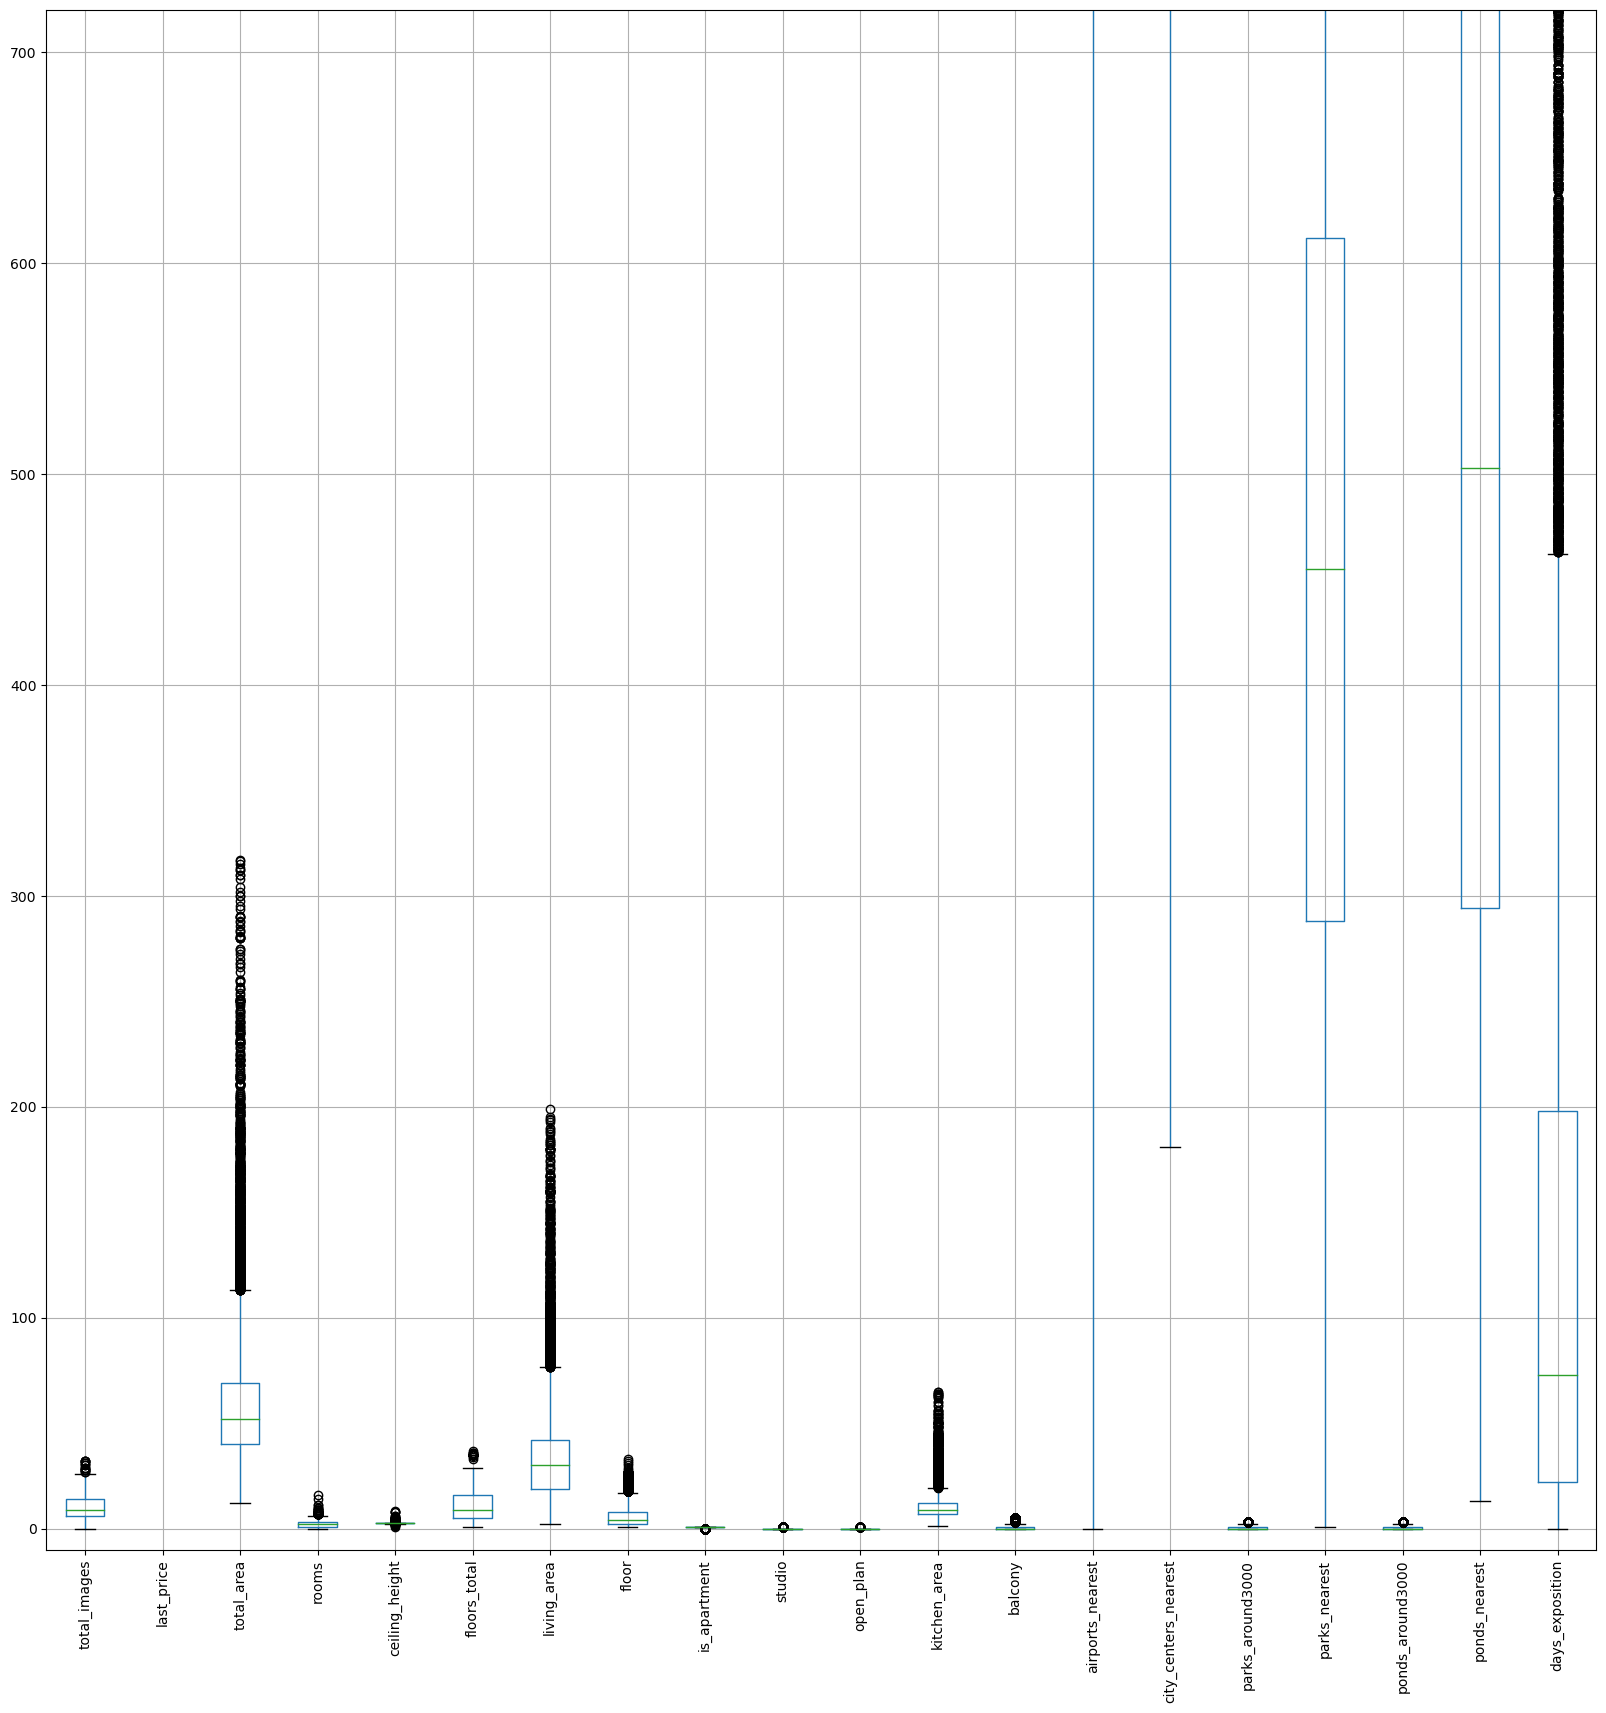

In [45]:
#Построим еще раз диаграмму размаха
data.boxplot(figsize=(20, 20), rot=90)
plt.ylim(-10, 720)

Построим гистограммы столбцов с числовыми данными, чтобы проверить, как повляили внесенные нами изменения на графики. А также проверним количество удаленных данных: сколько осталось строк в таблице.

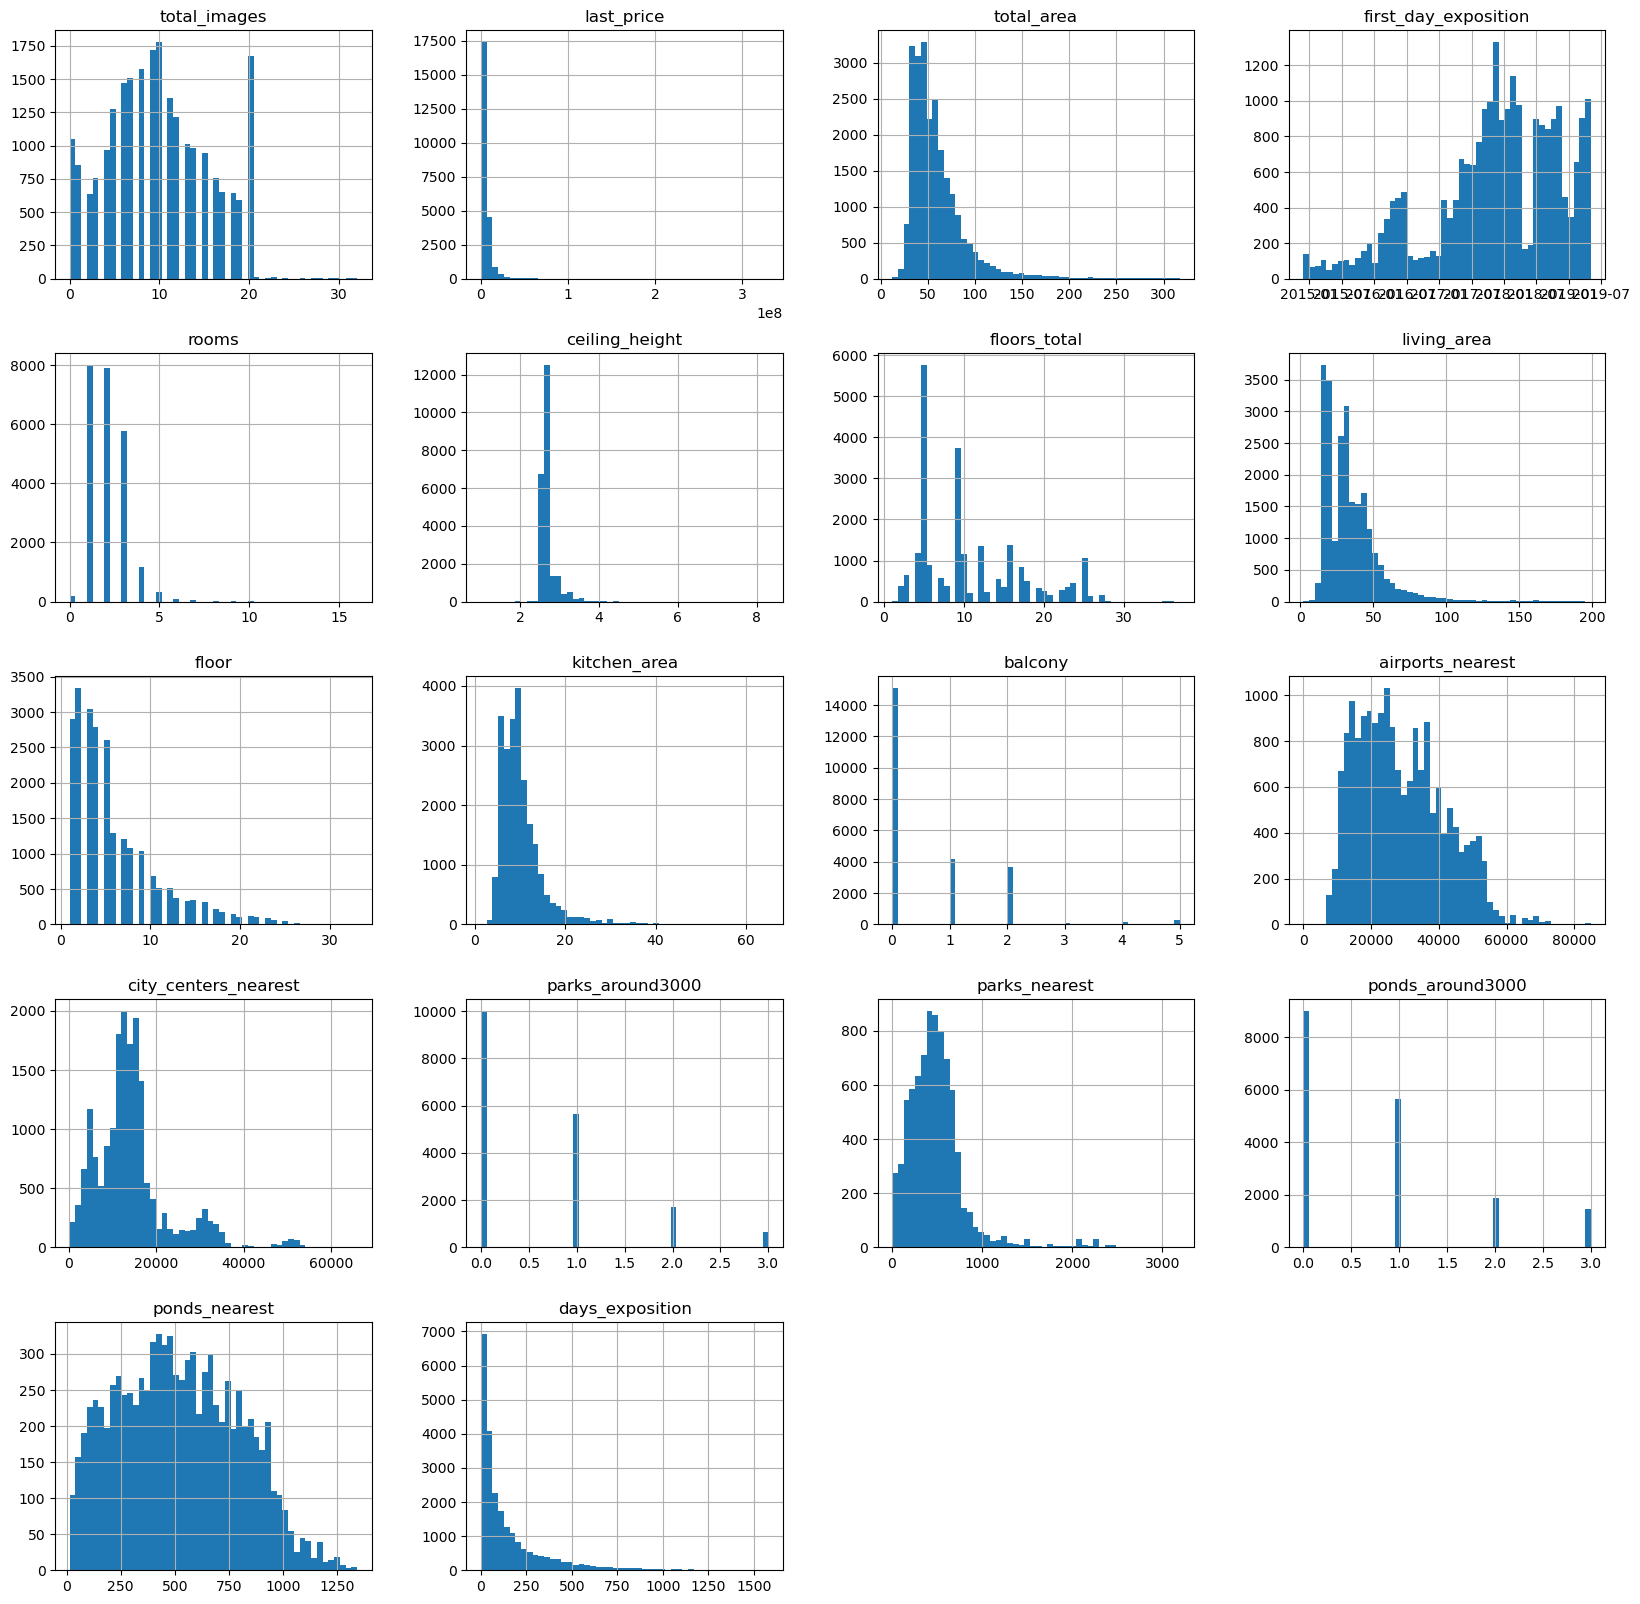

In [46]:
data.hist(bins=50, figsize=(20, 20))
plt.show()

In [47]:
print('Количество строк после удаления аномальных значений:', len(data))
print('Было удалено', round(100 - len(data)/data_len * 100, 2), '% данных')

Количество строк после удаления аномальных значений: 23486
Было удалено 0.9 % данных


По сравнению с предыдущими диаграммами, видно, что выбросы сократились, аномальные значения были благополучно удалены.

Количество строк также изменилось с 23698 до 23486, а это 99,1% от изначального варианта базы. Часть значений была удалена, в эти удаленные значения входили дубликаты, аномальные значения, строки с незначительным количеством пропусков.


### Посчитаем и добавим в таблицу новые столбцы

In [48]:
#Посчитаем цену 1 квадратного метра и округлим до 2 знаков после запятой
data['price_of_one_metre'] = data['last_price'] / data['total_area']
data['price_of_one_metre'] = data['price_of_one_metre'].round(2)
data['price_of_one_metre']

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: price_of_one_metre, Length: 23486, dtype: float64

In [49]:
#Считаем день недели, месяц и год публикации
data['day_of_week'] = data['first_day_exposition'].dt.weekday
data['publication_month'] = data['first_day_exposition'].dt.month
data['publication_year'] = data['first_day_exposition'].dt.year

In [50]:
#Считаем тип этажа квартиры: "первый", "последний", "другой"
def categorize_floor_type(floor, all_floors):
    try:
        if floor == 1:
            return 'Первый'
        elif floor == all_floors:
            return 'Последний'
        else:
            return 'Другой'
    except:
        return ('Нет категории')
    
data['floor_type'] = data.apply(lambda x: categorize_floor_type(x['floor'], x['floors_total']), axis=1)

In [51]:
#Расстояние до центра города в км
data['city_center_near_km'] = data['city_centers_nearest'] / 1000
data['city_center_near_km'] = data['city_center_near_km'].round(0)

Проверяем, все ли новые столбцы добавились.

In [52]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_one_metre,day_of_week,publication_month,publication_year,floor_type,city_center_near_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,482.0,2.0,755.0,0.0,120370.37,3,3,2019,Другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,Первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,Другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.289724,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,Другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,Другой,8.0


При просмотре обновленной таблицы, видим, что посчитанные ранее новые столбцы были добавлены в конец таблицы. Теперь в таблице есть столбцы отвечающие за день, месяц и год публикации, расстояние до центра в километрах, цена одного квадратного метра квартиры.

### Проведите исследовательский анализ данных

In [53]:
#Новая таблица по изучаемым значениям
columns_data_new = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height',
                      'floor_type', 'floors_total', 'city_centers_nearest', 'parks_nearest']

data_new = data[columns_data_new]
data_new.head(10)

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor_type,floors_total,city_centers_nearest,parks_nearest
0,108.00,51.000000,25.000000,13000000,3,2.70,Другой,16,16028.0,482.0
1,40.40,18.600000,11.000000,3350000,1,2.65,Первый,11,18603.0,NaN
2,56.00,34.300000,8.300000,5196000,2,2.65,Другой,5,13933.0,90.0
3,159.00,90.289724,27.413793,64900000,3,2.65,Другой,14,6800.0,84.0
4,100.00,32.000000,41.000000,10000000,2,3.03,Другой,14,8098.0,112.0
5,30.40,14.400000,9.100000,2890000,1,2.65,Другой,12,NaN,NaN
6,37.30,10.600000,14.400000,3700000,1,2.65,Другой,26,19143.0,NaN
7,71.60,40.658769,18.900000,7915000,2,2.65,Другой,24,11634.0,NaN
8,33.16,15.430000,8.810000,2900000,1,2.65,Другой,27,NaN,NaN
9,61.00,43.600000,6.500000,5400000,3,2.50,Другой,9,15008.0,NaN


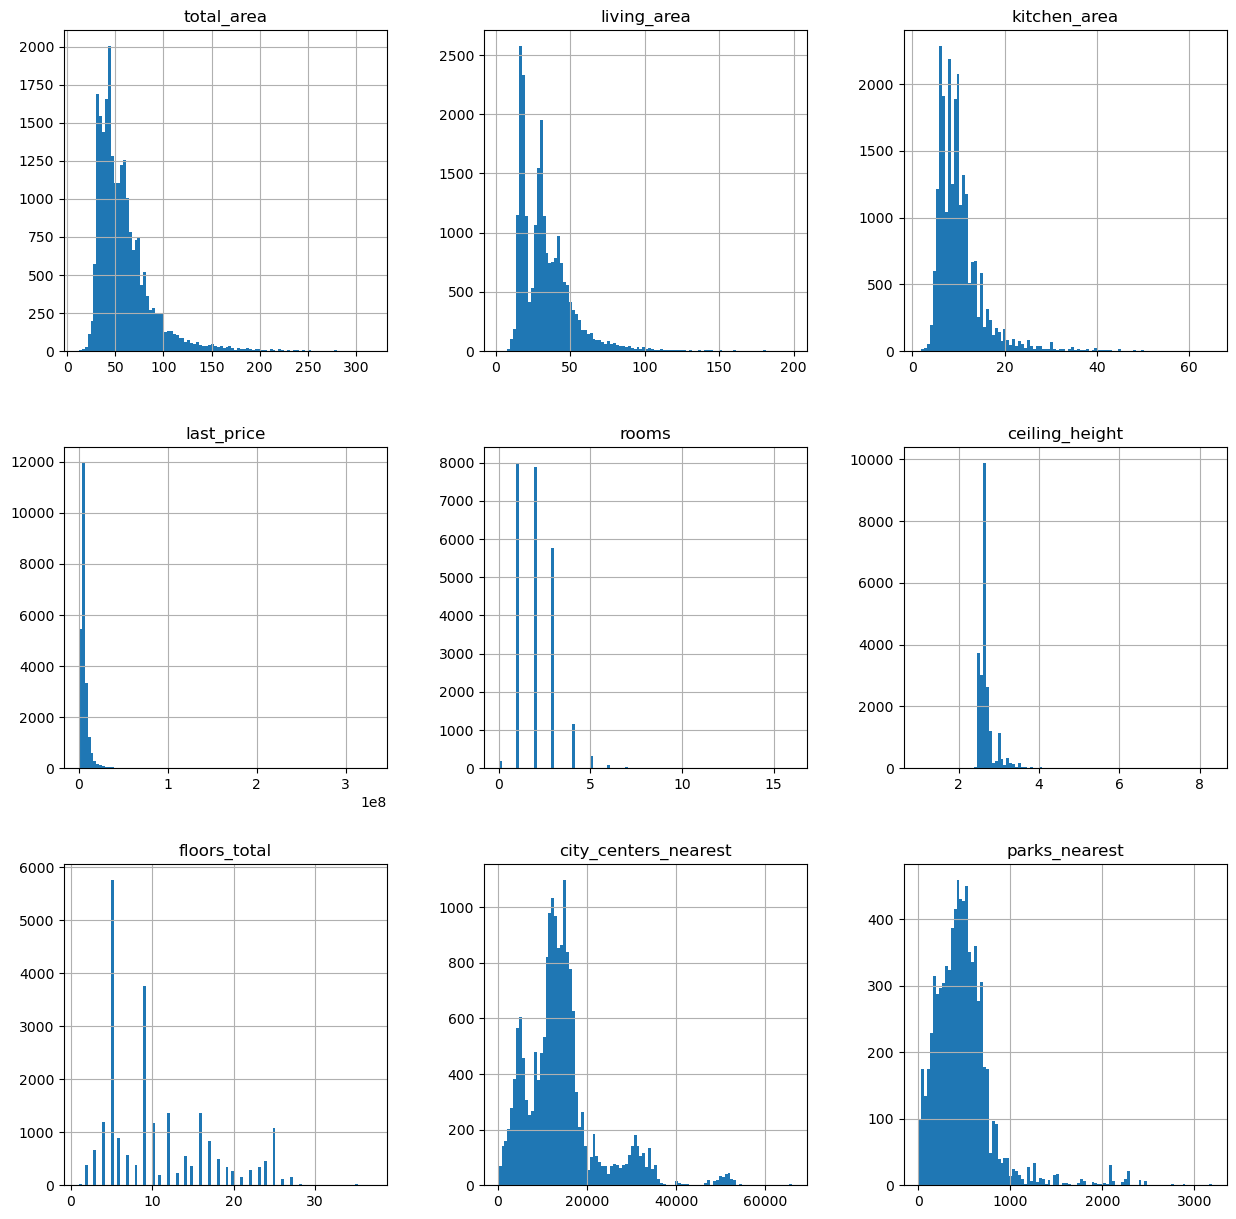

In [54]:
#Построим гистограммы для всех столбцов
data_new.hist(bins=100, grid=True, figsize=(15, 15))
plt.show()

In [55]:
#Выведем статистические характеристики данных
data_new.describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floors_total,city_centers_nearest,parks_nearest
count,23486.000000,23486.000000,23486.000000,2.348600e+04,23486.000000,23486.000000,23486.000000,17988.000000,7981.000000
mean,59.422250,34.068213,10.370839,6.289299e+06,2.059227,2.696290,10.681385,14214.609239,490.831600
std,30.687744,19.770015,5.480708,7.755511e+06,1.046922,0.229463,6.583082,8606.578656,341.207655
min,12.000000,2.000000,1.300000,1.219000e+04,0.000000,1.000000,1.000000,181.000000,1.000000
25%,40.000000,19.000000,7.000000,3.400000e+06,1.000000,2.600000,5.000000,9287.500000,288.000000
50%,52.000000,30.000000,9.000000,4.600000e+06,2.000000,2.650000,9.000000,13114.000000,455.000000
75%,69.200000,42.000000,12.000000,6.750000e+06,3.000000,2.700000,16.000000,16293.000000,612.000000
max,317.000000,199.000000,65.000000,3.300000e+08,16.000000,8.300000,37.000000,65968.000000,3190.000000


- Ранее в некоторых столбцах были уже удалены аномальные значения, порядка 0,9%;
- Еще раз проанализируем данные в этих столбцах и если необходимо внесем правки;
- Построим дополнительно диаграммы размаха для каждого из этих столбцов, чтобы проанализировать выбросы.

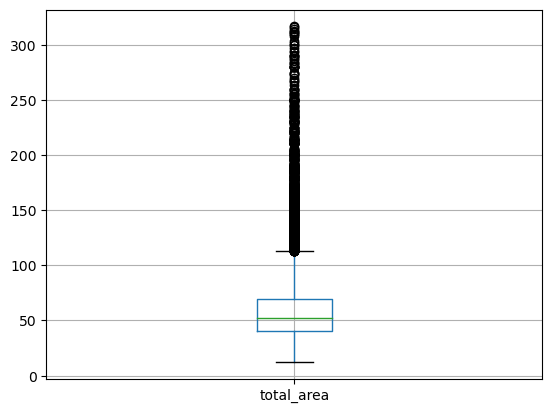

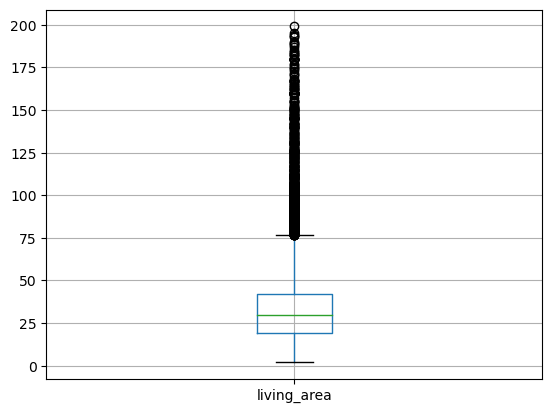

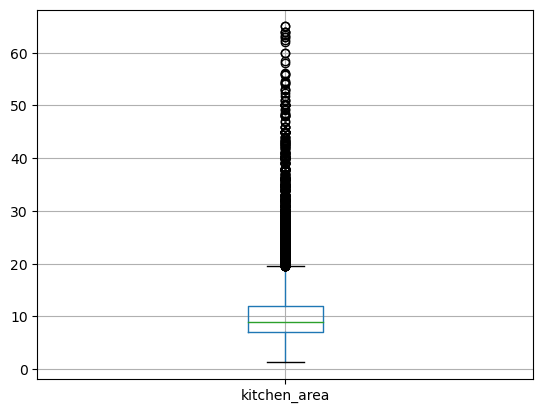

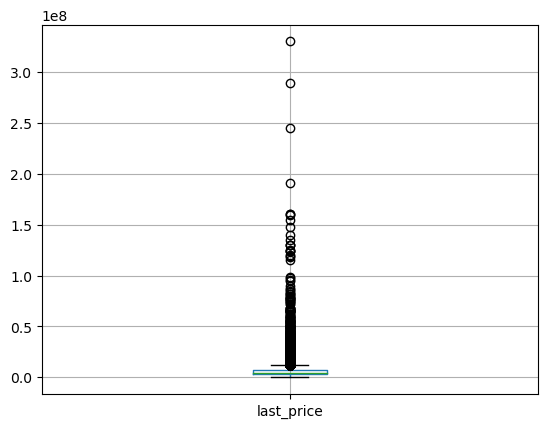

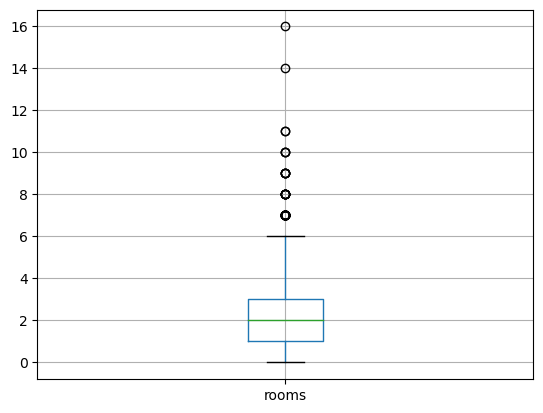

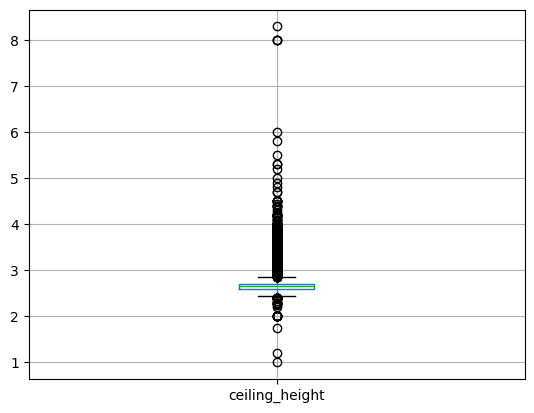

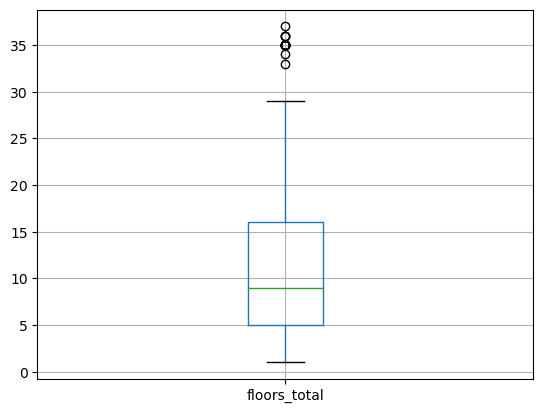

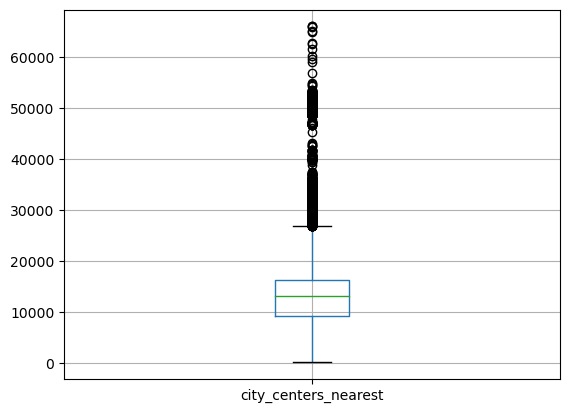

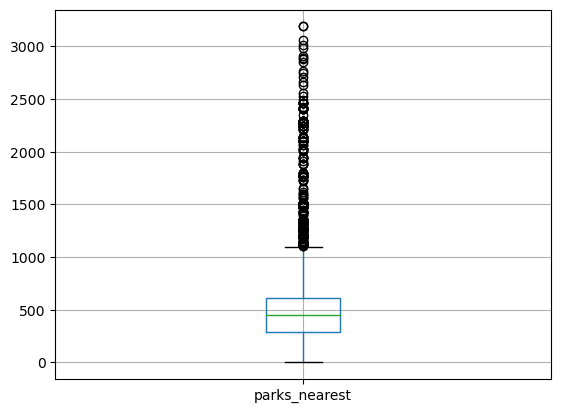

In [56]:
plot_boxplot(data_new, 'total_area')
plot_boxplot(data_new, 'living_area')
plot_boxplot(data_new, 'kitchen_area')
plot_boxplot(data_new, 'last_price')
plot_boxplot(data_new, 'rooms')
plot_boxplot(data_new, 'ceiling_height')
plot_boxplot(data_new, 'floors_total')
plot_boxplot(data_new, 'city_centers_nearest')
plot_boxplot(data_new, 'parks_nearest')

In [57]:
#Напишем функцию для построения гистограмм
def hist_build(column, x_label, y_label, bins_value):
    data_new[column].hist(bins=bins_value, figsize=(5, 5))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

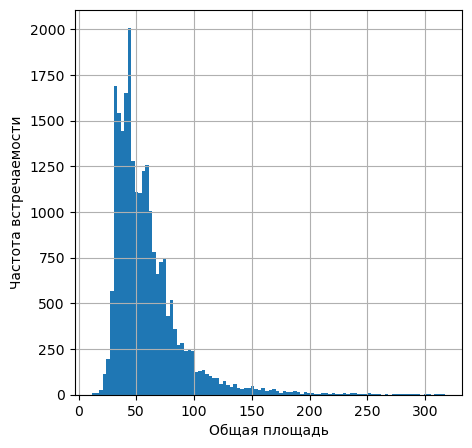

In [58]:
hist_build('total_area', 'Общая площадь', 'Частота встречаемости', 100)

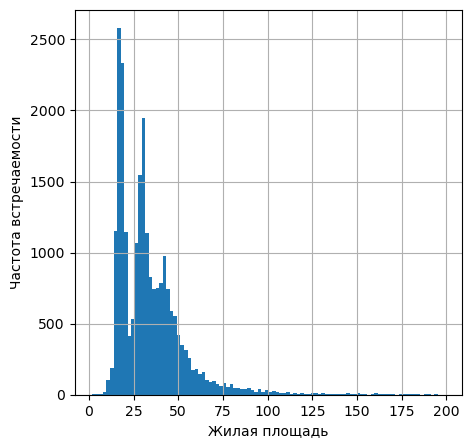

In [59]:
hist_build('living_area', 'Жилая площадь', 'Частота встречаемости', 100)

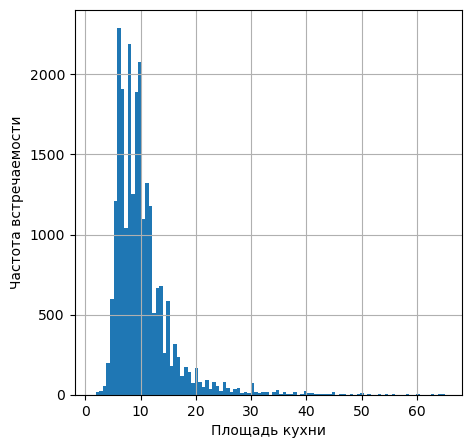

In [60]:
hist_build('kitchen_area', 'Площадь кухни', 'Частота встречаемости', 100)

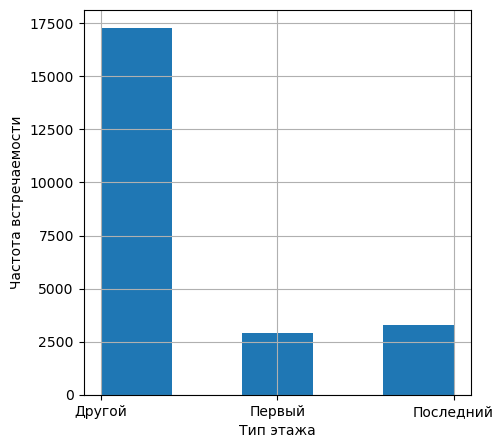

In [61]:
hist_build('floor_type', 'Тип этажа', 'Частота встречаемости', 5)

**Проанализируем гистограммы и данные каждого из столбцов:**
- В столбце `total_area` в предыдущем разделе на диаграмме размаха были единичные аномальные выбросы, они были удалены. Сейчас на диаграмме размаха отсутствуют единичные выбросы. Выбросы за 3 квантилью и высокие значения на гистограмме могут говорить о том, что в продаже есть объекты недвижимости большой площади, но таких объявлений не так много, поэтому больше удалять значения в этом столбце не нужно;
- В столбце `living_area` в предыдущем разделе также часть выбросов была удалена, те выбросы, которые сейчас присутствуют - удалять не надо. В описании таблицы видим что все минимальные, квантильные и максимальные значения меньше значений общей площади объектов недвижимости;
- В столбце `kitchen_area` аналогичная ситуация со столбцом `living_area`. Удалять дополнительно значения не нужно. В предыдущем разделе уже были удалены аномальные значения;
- Также на гистограммах видим, что в районе 50 в столбце `total_area`, 25 в столбце `living_area`, и в районе 8 в `kitchen_area` есть небольшие просадки. Ранее мы находили долю которую занимает жилая площадь и площадь кухни от общей площади объекты недвижимости - это 0,56 и 0, 17 соответственно. Если посчитаем эти значения от общей площади равной 50, то получим значения 28 и 8,5 соответственно. Поэтому корректировать и менять значения в этих местах данных столбцов не будем.
- В столбце `last_price` после 175млн видим единичные выбросы значений, удалим эти отдельные значения, так как большая часть данных находится в пределах 100млн и за 3 квантилью находятся выбросы, но они не являются единичными, как эти. А значения выше 175млн они слишком большие, по сравнению с другими значениями в столбце и могут искажать средние значения данных по столбцу, могут мешать анализу;
- В столбце `rooms` выбивающиеся значения находятся за количеством комнат равных 12. Эти значения единичные, но также могут искажать данные и будущие отображения данных на графиках, поэтому удалим количесвто комнат превышающих 12;
- В столбце `ceiling_height` аномальными кажутся высоты потолков высотой 1 метр и больше 6 метров(большая высота потолков может быть в двухэтажных типах квартир, в премиальных апартаментах в старых постройках и тд). На диаграмме размаха, такие значения являются выбросами. Ранее, мы выяснили, что в некоторых значениях данного столбца была пропущена запятая, и что аномальные значения потолков 25 и 35, на самом деле являются средней высото потолка 2,5 и 3,5 соответственно. Однако, высота потолков равная одному метру не входила в число значений, в которых произошла ошибка при заполнении данных. Так как данное поле является обязательным для заполнения, но по каким-то причинам была неизвестна высота потолков, то в данное поле просто было внесено знаечние 1, вместо пустого значения. Так как ранее пропуски в столбце `ceiling_height` мы заменяли медианным значеним по столбцу, заменим аналогично на медианное значение высоту потолков со значением 1, а высоту потолков выше 6 метров удалим.
- В столбце `floor_type` самое большое количество объектов недвижимости находится на "другом" этаже, это похоже на правду, так как в домах только 1 первый этаж и 1 последний, а количество "других" этажей может варироваться сильно, поэтому вероятность встретить в объявлении "первый" и "последний" этаж ниже, чем "другой". Поэтому количество объектов недвижимости на "другом" этаже кратно превышают количество объектов недвижимости на "первом" и "последнем" этажах. Данные в этом столбце дополнительно редактировать не будем;
- В столбце `floors_total` наибольшее количество объектов недвижимости находятся в 5 этажных дома. Есть небольшое количество домов с количеством этажей больше 30 - это могут быть современные новостройки. Поэтому дополнительно удалять или редоктировать количество этажей не будем;
- В столбце `city_centers_nearest` данные заполнялись автоматически. По какому именно принципу это делалось на основе картографических данных, не известно. Если в небольшом населенном пункте нет центра, заполнялось ли это поле расстоянием до центра ближайшего крупного населенного пункта, так как есть большие значения в данном столбце, такие как 60тыс метров. Сложно сказать однозначно как именно эти данные заполнялись. Поэтому корректно заменить значения не удастся, следовательно, удалять или заменять значение в этом столбце не будем;
- В столбце `parks_nearest` данные также заполнялись автоматически, выбрасов единичных на диаграмме размаха нет, среднее значения расстояния до ближайшего парка - 455 метров, самое дальнее расстояние - 3тыс метров (3км), это похоже на правду, поэтому удалять выбросы или корректировать данные в этом столбце не будем.

Выбросы могут влиять на показатель стандартных отклонений, нахождения средних значений по столбцу, смещение значений квантилей, отображение взаимосвязей одних данных от других на графиках, поэтому было принято решение такие выбросы удалить или заменить более корректными значениями, в описаных выше столбцах.

Ниже обработаем те выбросы, которые нам показались не правдоподобными или будут мешать в дальнейшей работе.


In [62]:
#Обработаем высоту потолков ниже 1,5 метра
data_new.loc[(data_new['ceiling_height'] <= 1.5), 'ceiling_height'] = data_new['ceiling_height'].median()

In [63]:
data_new = data_new.query('rooms <= 12')
data_new = data_new.query('ceiling_height <= 6')
data_new = data_new.query('last_price < 175000000')

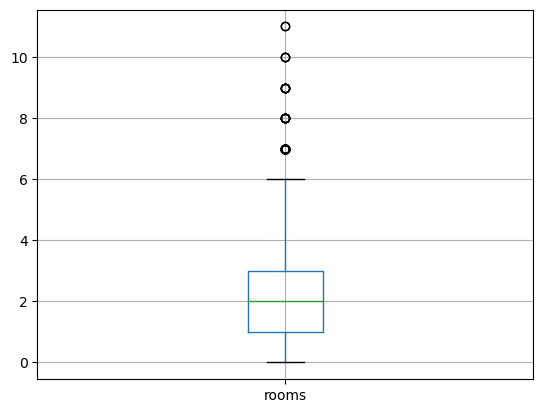

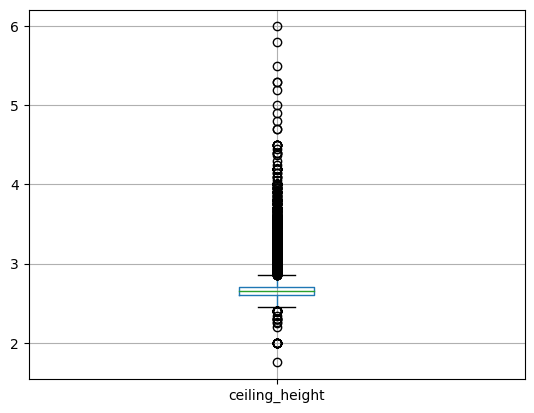

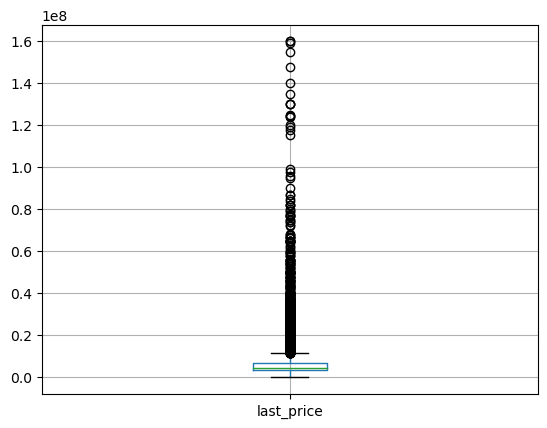

In [64]:
plot_boxplot(data_new, 'rooms')
plot_boxplot(data_new, 'ceiling_height')
plot_boxplot(data_new, 'last_price')

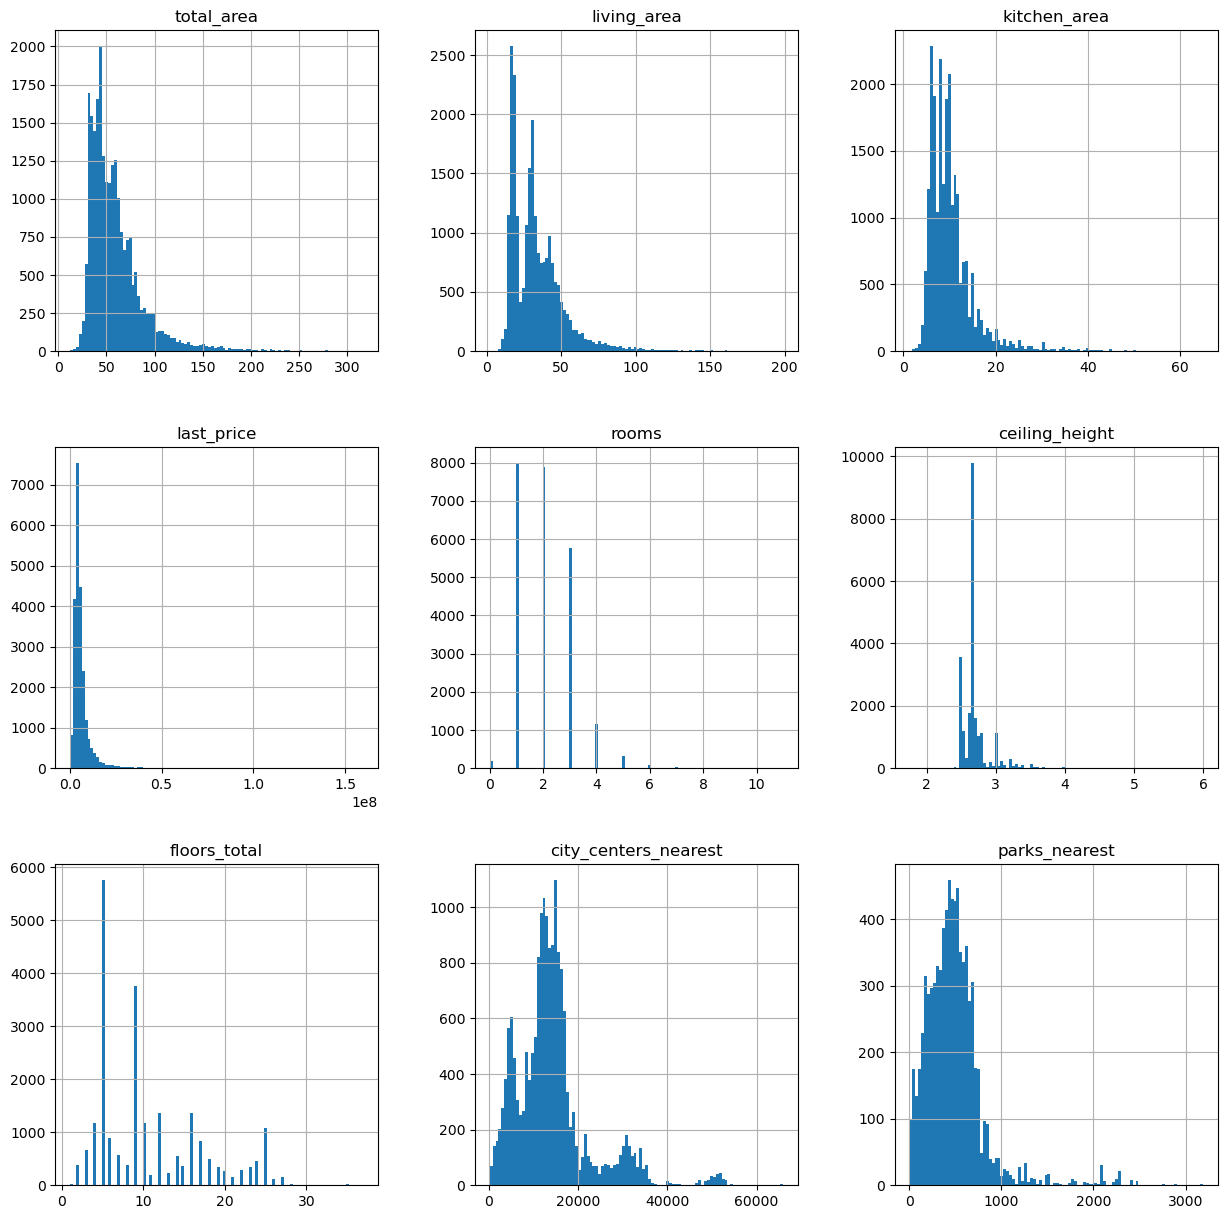

In [65]:
#Еще раз построим гистограммы для всех столбцов
data_new.hist(bins=100, figsize=(15, 15))
plt.show()

In [66]:
print('Количество строк после удаления аномальных значений:', len(data_new))
print('После дополнительной обработки строк в столбцах', round(100 - len(data_new)/data_len * 100, 2)\
      ,'% данных всего было удалено')

Количество строк после удаления аномальных значений: 23476
После дополнительной обработки строк в столбцах 0.94 % данных всего было удалено


In [67]:
#Добавляю новый столбец 
data_new['days_exposition'] = data['days_exposition']
data_new.sort_values(by='days_exposition', ascending=False).head(20)

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor_type,floors_total,city_centers_nearest,parks_nearest,days_exposition
18843,48.20,27.400000,7.700000,3500000,2,2.50,Другой,5,NaN,NaN,1580.0
1109,95.80,58.300000,20.000000,34878556,2,2.65,Другой,6,318.0,160.0,1572.0
9553,80.00,44.000000,15.000000,10600000,3,2.85,Другой,17,17110.0,NaN,1553.0
1885,79.60,42.700000,18.000000,13300000,2,3.00,Другой,8,11096.0,537.0,1513.0
20969,133.00,58.000000,45.000000,13300000,4,3.00,Другой,5,5032.0,NaN,1512.0
6691,42.98,18.720000,11.310000,4400000,1,2.65,Первый,5,30358.0,439.0,1512.0
14093,100.00,76.000000,10.000000,9500000,4,3.00,Последний,5,4798.0,690.0,1497.0
15313,139.80,79.386814,24.103448,9278000,4,2.80,Другой,5,35515.0,NaN,1489.0
19123,82.00,60.000000,8.000000,5990000,3,3.00,Другой,4,34619.0,NaN,1485.0
11955,76.00,36.000000,14.000000,11400000,2,2.65,Другой,9,11096.0,537.0,1484.0


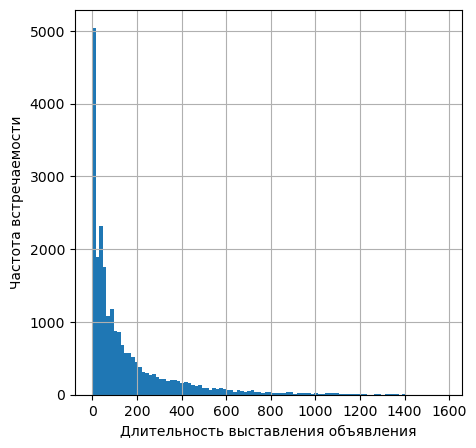

In [68]:
hist_build('days_exposition', 'Длительность выставления объявления', 'Частота встречаемости', 100)

In [69]:
print('Медианное значение:', data_new['days_exposition'].median())
print('Среднее значение:', data_new['days_exposition'].mean())

Медианное значение: 73.0
Среднее значение: 156.20761628897597


У нас есть всплеск продаж в первые дни, а также всплеск поменьше примерно через месяц после публикации объявления. Можно предположить, что объявление провисело месяц, и если владелец его не продлил, то оно автоматически закрылось как будто продажа совершилась.

По гистограмме видно, что большинство квартир продаются в промежутке от 0 до 100 дней, то есть в пределах 3 месяцев, значение медианы также говорит о том, что в среднем на продажу уходит 2 месяца.

Быстрыми можно считать продажи, совершенные в первые дни, где значения близкие к 0. Некоторые объявления провисели меньше суток.

Небольшая часть объявлений висела достаточно долго, более 400 дней (то есть больше года). Такие объявления можно отнести к необычайно долгим. При этом можно предположить, что объявление просто осталось на платформе, а владелец уже мог продать квартиру за такой срок.

In [70]:
#Добавим новые столбцы в таблицу
data_new.loc[:, 'day_of_week'] = data['day_of_week']
data_new.loc[:, 'publication_month'] = data['publication_month']
data_new.loc[:, 'publication_year'] = data['publication_year']

data_new

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor_type,floors_total,city_centers_nearest,parks_nearest,days_exposition,day_of_week,publication_month,publication_year
0,108.00,51.000000,25.000000,13000000,3,2.70,Другой,16,16028.0,482.0,0.0,3,3,2019
1,40.40,18.600000,11.000000,3350000,1,2.65,Первый,11,18603.0,NaN,81.0,1,12,2018
2,56.00,34.300000,8.300000,5196000,2,2.65,Другой,5,13933.0,90.0,558.0,3,8,2015
3,159.00,90.289724,27.413793,64900000,3,2.65,Другой,14,6800.0,84.0,424.0,4,7,2015
4,100.00,32.000000,41.000000,10000000,2,3.03,Другой,14,8098.0,112.0,121.0,1,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,133.81,73.300000,13.830000,9700000,3,3.70,Другой,5,4232.0,796.0,0.0,1,3,2017
23695,59.00,38.000000,8.500000,3100000,3,2.65,Другой,5,NaN,NaN,45.0,0,1,2018
23696,56.70,29.700000,9.775862,2500000,2,2.65,Первый,3,NaN,NaN,0.0,6,2,2018
23697,76.75,43.583247,23.300000,11475000,2,3.00,Другой,17,10364.0,173.0,602.0,1,3,2017


In [71]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23476 entries, 0 to 23698
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_area            23476 non-null  float64
 1   living_area           23476 non-null  float64
 2   kitchen_area          23476 non-null  float64
 3   last_price            23476 non-null  int32  
 4   rooms                 23476 non-null  int64  
 5   ceiling_height        23476 non-null  float64
 6   floor_type            23476 non-null  object 
 7   floors_total          23476 non-null  int32  
 8   city_centers_nearest  17979 non-null  float64
 9   parks_nearest         7975 non-null   float64
 10  days_exposition       23476 non-null  float64
 11  day_of_week           23476 non-null  int64  
 12  publication_month     23476 non-null  int64  
 13  publication_year      23476 non-null  int64  
dtypes: float64(7), int32(2), int64(4), object(1)
memory usage: 2.5+ MB


Сделаем сводные таблицы и построим графики, чтобы определить как различные факторы влияли на образование цены.

In [72]:
data_pivot_price = data_new.pivot_table(index='total_area', values=['last_price', 'living_area',
                                                                    'kitchen_area','rooms', 'day_of_week',
                                                                    'publication_month', 'publication_year'],
                                        aggfunc='median')
data_pivot_price = data_pivot_price.reset_index()
data_pivot_price.columns = ['Площадь жилья', 'День публикации', 'Площадь кухни', 'Стоимость жилья', 'Жилая площадь',
                            'Месяц публикации', 'Год публикации', 'Кол-во комнат']
data_pivot_price.sort_values(by='Площадь жилья', ascending=False)
data_pivot_price

,Площадь жилья,День публикации,Площадь кухни,Стоимость жилья,Жилая площадь,Месяц публикации,Год публикации,Кол-во комнат
0,12.0,2.0,2.068966,2400000.0,10.000000,7.0,2017.0,1.0
1,13.0,2.0,2.241379,1850000.0,7.382179,7.0,2018.0,1.0
2,13.2,0.0,2.275862,1686000.0,7.495751,12.0,2018.0,1.0
3,14.0,6.0,2.000000,1190000.0,11.000000,7.0,2018.0,1.0
4,15.0,1.5,2.586207,1725000.0,8.517898,7.0,2018.0,1.0
...,...,...,...,...,...,...,...,...
2097,312.0,3.5,32.500000,31950000.0,160.500000,9.0,2016.0,5.5
2098,313.0,0.0,13.200000,23500000.0,179.200000,2.0,2017.0,9.0
2099,315.0,3.0,37.000000,40000000.0,182.000000,4.0,2017.0,5.0
2100,316.3,2.0,54.534483,24000000.0,187.000000,3.0,2015.0,8.0


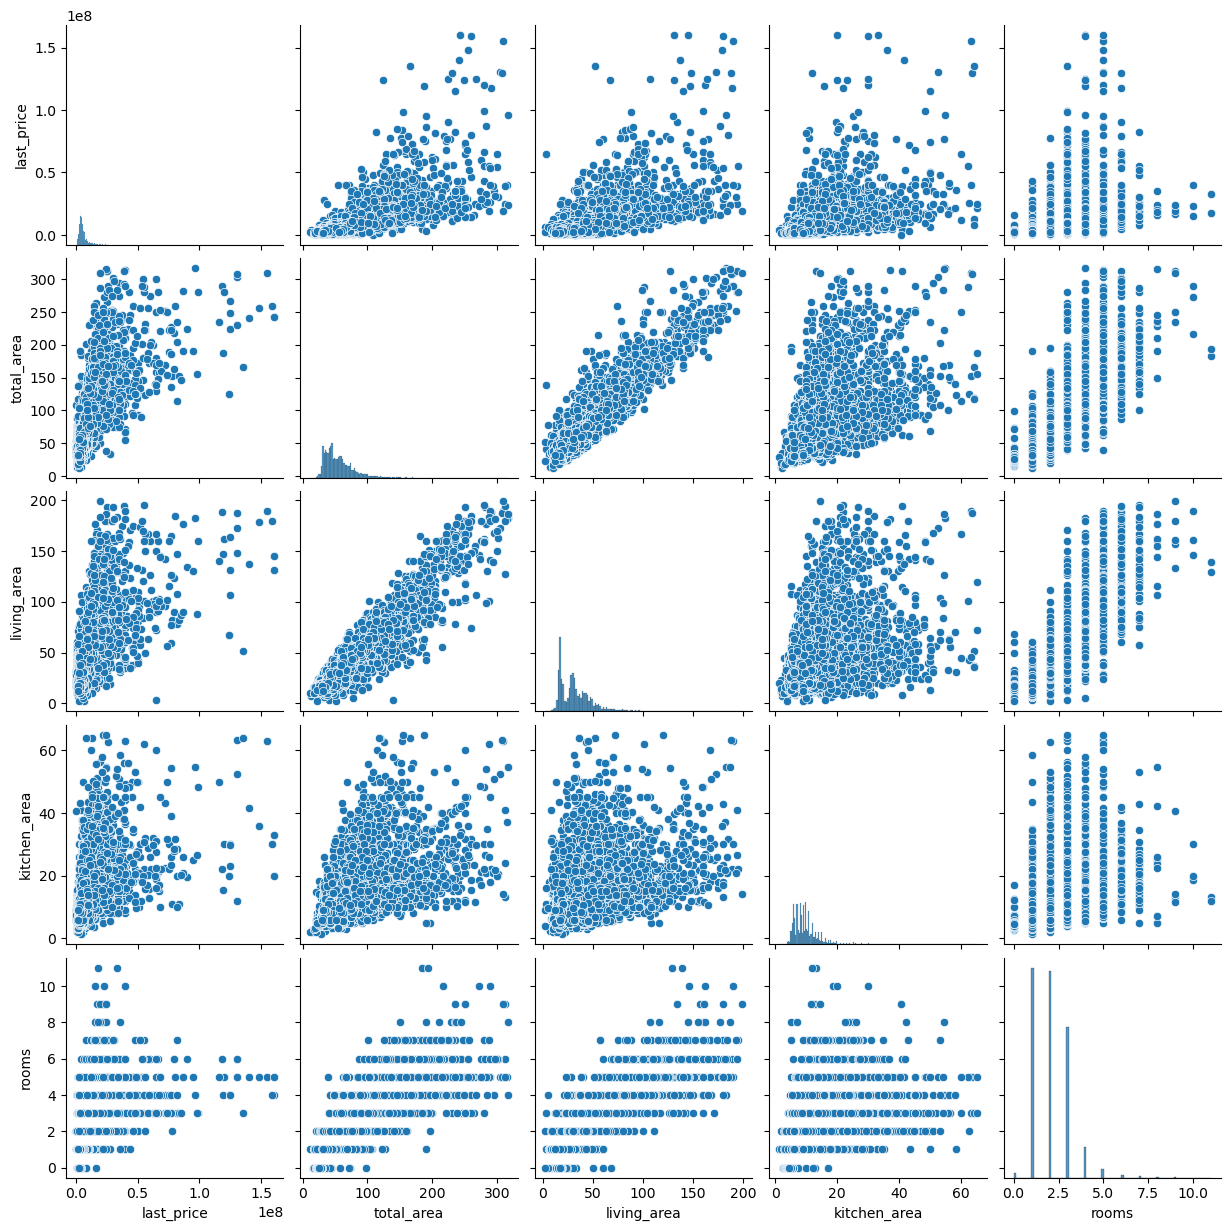

In [73]:
sns.pairplot(data_new[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']])
plt.show()

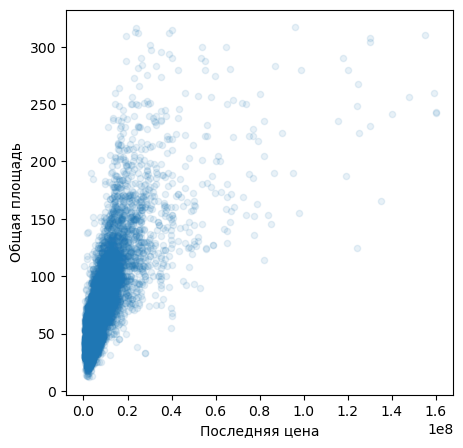

In [74]:
data_new.plot(x='last_price', y='total_area', kind='scatter', alpha=0.1, figsize=(5, 5))
plt.xlabel('Последняя цена')
plt.ylabel('Общая площадь')
plt.show()

Стоимость зависит от общей площади квартиры: чем больше площадь квартиры, тем выше цена.


In [75]:
data_pivot_price = data_new.pivot_table(index='living_area', values=['last_price', 'total_area',
                                                                    'kitchen_area','rooms', 'day_of_week',
                                                                    'publication_month', 'publication_year'],
                                        aggfunc='median')
data_pivot_price = data_pivot_price.reset_index()
data_pivot_price.columns = ['Жилая площадь', 'День публикации', 'Площадь кухни', 'Стоимость жилья', 
                            'Месяц публикации', 'Год публикации', 'Кол-во комнат','Площадь жилья']
data_pivot_price.sort_values(by='Жилая площадь', ascending=False)
data_pivot_price

,Жилая площадь,День публикации,Площадь кухни,Стоимость жилья,Месяц публикации,Год публикации,Кол-во комнат,Площадь жилья
0,2.0,0.5,6.482759,4340000.0,1.5,2018.0,1.0,37.5
1,3.0,3.5,13.500000,34715000.0,9.0,2016.0,2.0,90.0
2,5.0,5.0,3.793103,2680000.0,8.0,2018.0,0.0,22.0
3,5.4,3.0,9.800000,6100000.0,2.0,2019.0,4.0,77.6
4,6.0,3.0,17.000000,3799000.0,4.0,2018.0,1.0,31.0
...,...,...,...,...,...,...,...,...
2354,193.0,3.0,21.000000,30000000.0,7.0,2017.0,7.0,251.0
2355,193.5,2.0,26.600000,24900000.0,2.0,2018.0,6.0,281.1
2356,194.0,3.0,41.000000,39000000.0,7.0,2017.0,6.0,312.0
2357,195.0,3.0,22.000000,55000000.0,3.0,2018.0,7.0,280.0


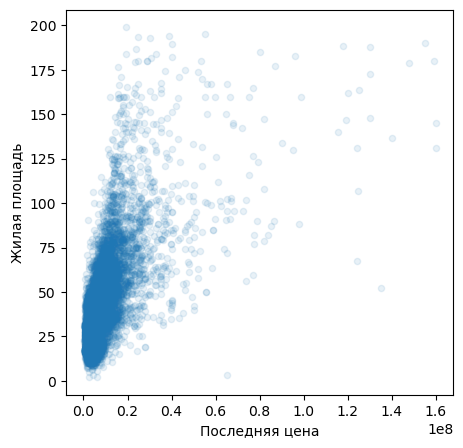

In [76]:
data_new.plot(x='last_price', y='living_area', kind='scatter', alpha=0.1, figsize=(5,5))
plt.xlabel('Последняя цена')
plt.ylabel('Жилая площадь')
plt.show()

На графике все еще видим линейную зависимость, размер жилой площади влияет на образование цены.


In [77]:
data_pivot_price = data_new.pivot_table(index='kitchen_area', values=['last_price', 'total_area',
                                                                    'living_area','rooms', 'day_of_week',
                                                                    'publication_month', 'publication_year'],
                                        aggfunc='median')
data_pivot_price = data_pivot_price.reset_index()
data_pivot_price.columns = ['Площадь кухни', 'День публикации', 'Стоимость жилья', 'Жилая площадь',
                            'Месяц публикации', 'Год публикации', 'Кол-во комнат', 'Площадь жилья']
data_pivot_price.sort_values(by='Площадь кухни', ascending=False)
data_pivot_price

,Площадь кухни,День публикации,Стоимость жилья,Жилая площадь,Месяц публикации,Год публикации,Кол-во комнат,Площадь жилья
0,1.300000,2.0,4250000.0,19.500000,5.0,2019.0,1.0,28.5
1,2.000000,1.0,2720000.0,16.000000,7.0,2018.0,1.0,24.0
2,2.068966,2.0,2400000.0,10.000000,7.0,2017.0,1.0,12.0
3,2.241379,2.0,1850000.0,7.382179,7.0,2018.0,1.0,13.0
4,2.275862,0.0,1686000.0,7.495751,12.0,2018.0,1.0,13.2
...,...,...,...,...,...,...,...,...
1618,62.500000,1.0,25900000.0,42.700000,8.0,2018.0,2.0,125.6
1619,63.000000,4.5,97500000.0,117.600000,9.5,2017.5,4.0,231.5
1620,63.400000,6.0,130000000.0,187.900000,4.0,2016.0,5.0,307.8
1621,64.000000,3.0,12990000.0,36.400000,3.0,2017.0,3.0,119.6


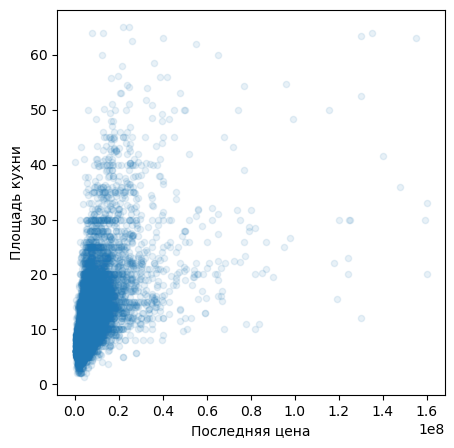

In [78]:
data_new.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.1, figsize=(5, 5))
plt.xlabel('Последняя цена')
plt.ylabel('Площадь кухни')
plt.show()

На графике видим, что площадь кухни уже не так сильно влияет на образование стоимости. В нижней части графика с небольшими площадями кухни тоже есть высокие цены, в то время как в предыдущих графиках (площади объекта недвижимости и жилой площади) в нижней части на маленьких площадях при высоких ценах, объектов недвижимости практически не было, и была видна более линейная зависимость цены от площадей. 

In [79]:
data_pivot_price = data_new.pivot_table(index='rooms', values=['last_price', 'total_area',
                                                                    'living_area', 'kitchen_area', 'day_of_week',
                                                                    'publication_month', 'publication_year'],
                                        aggfunc='median')
data_pivot_price = data_pivot_price.reset_index()
data_pivot_price.columns = ['Кол-во комнат', 'День публикации', 'Площадь кухни', 'Стоимость жилья', 'Жилая площадь',
                            'Месяц публикации', 'Год публикации', 'Площадь жилья']
data_pivot_price.sort_values(by='Кол-во комнат', ascending=False)
data_pivot_price

,Кол-во комнат,День публикации,Площадь кухни,Стоимость жилья,Жилая площадь,Месяц публикации,Год публикации,Площадь жилья
0,0,3.0,4.491379,2700000,18.0,8.0,2017.0,26.05
1,1,3.0,9.000000,3600000,17.8,6.0,2017.0,36.58
2,2,3.0,8.847414,4750000,30.5,6.0,2017.0,53.00
3,3,2.0,10.000000,6200000,44.8,6.0,2017.0,72.70
4,4,3.0,11.600000,9000000,63.1,6.0,2017.0,98.90
5,5,3.0,16.000000,13800000,90.0,6.0,2017.0,145.00
6,6,2.0,19.000000,17900000,117.0,6.0,2018.0,180.00
7,7,3.0,17.700000,20750000,130.5,7.0,2017.0,201.25
8,8,2.5,24.300000,18950000,157.5,4.0,2016.5,232.00
9,9,1.0,13.200000,22250000,160.6,4.0,2018.0,250.00


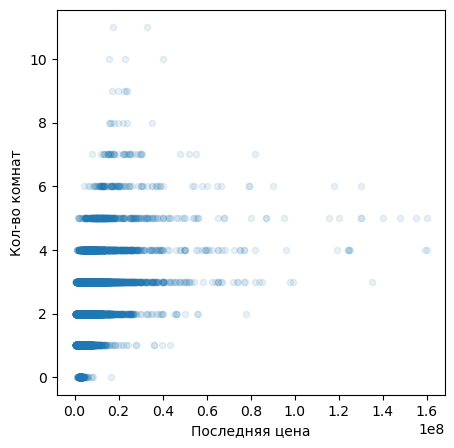

In [80]:
data_new.plot(x='last_price', y='rooms', kind='scatter', alpha=0.1, figsize=(5, 5))
plt.xlabel('Последняя цена')
plt.ylabel('Кол-во комнат')
plt.show()

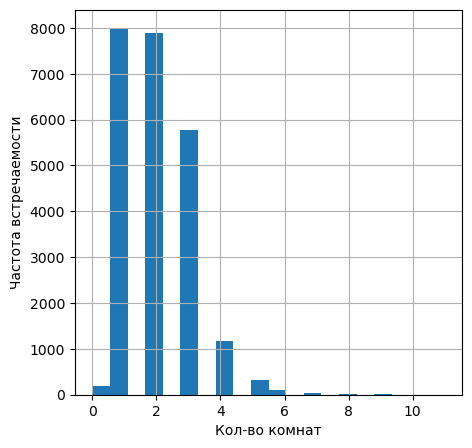

In [81]:
hist_build('rooms', 'Кол-во комнат', 'Частота встречаемости', 20)

Стоимость квартир растет на малых количествах комнат (до 3х комнат)/ Поэтому цена зависит от количества комнат.

In [82]:
data_pivot_price = data_new.pivot_table(index='floor_type', values=['last_price', 'total_area',
                                                                    'living_area', 'rooms', 'kitchen_area', 'day_of_week',
                                                                    'publication_month', 'publication_year'],
                                        aggfunc='median')
data_pivot_price = data_pivot_price.reset_index()
data_pivot_price.columns = ['Тип этажа', 'День публикации', 'Площадь кухни', 'Стоимость жилья', 'Жилая площадь',
                            'Месяц публикации', 'Год публикации',  'Кол-во комнат', 'Площадь жилья']
data_pivot_price.sort_values(by='Тип этажа', ascending=False)
data_pivot_price

,Тип этажа,День публикации,Площадь кухни,Стоимость жилья,Жилая площадь,Месяц публикации,Год публикации,Кол-во комнат,Площадь жилья
0,Другой,3,9.5,4800000,30.0,6,2017,2,52.0
1,Первый,3,8.0,3900000,30.0,6,2017,2,51.0
2,Последний,3,8.5,4300000,31.0,6,2017,2,53.0


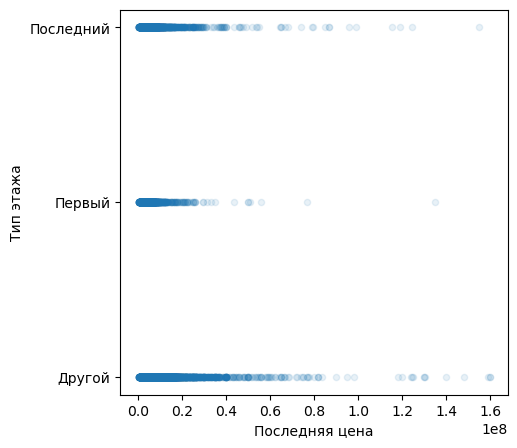

In [83]:
data_new.plot(x='last_price', y='floor_type', kind='scatter', alpha=0.1, figsize=(5, 5))
plt.xlabel('Последняя цена')
plt.ylabel('Тип этажа')
plt.show()

В квартирах расположенных на "других" этажах, стоимость жилья выше, чем у квартир, расположенных на первом и последнем этажах. Средняя стоимость на первых и последних этажах практически идентичная.

In [84]:
data_pivot_price = data_new.pivot_table(index='day_of_week', values=['last_price', 'total_area',
                                                                    'living_area', 'kitchen_area', 'rooms',
                                                                    'publication_month', 'publication_year'],
                                        aggfunc='median')
data_pivot_price = data_pivot_price.reset_index()
data_pivot_price.columns = ['День публикации', 'Площадь кухни', 'Стоимость жилья', 'Жилая площадь',
                            'Месяц публикации', 'Год публикации', 'Кол-во комнат', 'Площадь жилья']
data_pivot_price.sort_values(by='День публикации', ascending=False)
data_pivot_price

,День публикации,Площадь кухни,Стоимость жилья,Жилая площадь,Месяц публикации,Год публикации,Кол-во комнат,Площадь жилья
0,0,9.16,4650000,30.0,6,2018,2,52.10
1,1,9.00,4700000,30.0,7,2017,2,52.00
2,2,9.00,4700000,30.2,7,2017,2,52.35
3,3,9.00,4600000,30.0,6,2017,2,52.40
4,4,9.00,4550000,30.0,6,2017,2,51.00
5,5,9.00,4512000,30.0,6,2017,2,50.30
6,6,9.00,4500000,30.0,7,2018,2,51.00


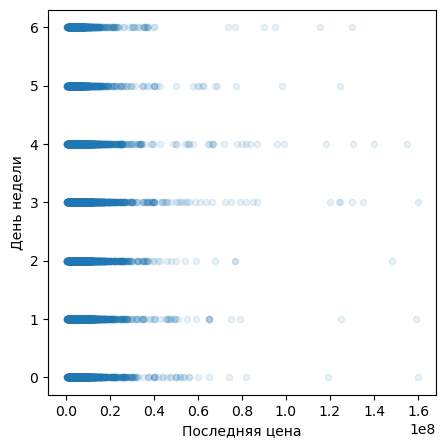

In [85]:
data_new.plot(x='last_price', y='day_of_week', kind='scatter', alpha=0.1, figsize=(5, 5))
plt.xlabel('Последняя цена')
plt.ylabel('День недели')
plt.show()

День публикации влияет на определение стоимости. В пятницу, субботу и воскресенье средняя стоимость ниже, а во вторник и среду средняя стоимость выше, чем в другие дни публикации объявления.

In [86]:
data_pivot_price = data_new.pivot_table(index='publication_month', values=['last_price', 'total_area',
                                                                    'living_area', 'kitchen_area', 'rooms',
                                                                    'day_of_week', 'publication_year'],
                                        aggfunc='median')
data_pivot_price = data_pivot_price.reset_index()
data_pivot_price.columns = ['Месяц публикации', 'День публикации', 'Площадь кухни', 'Стоимость жилья', 'Жилая площадь',
                            'Год публикации', 'Кол-во комнат', 'Площадь жилья']
data_pivot_price.sort_values(by='Месяц публикации', ascending=False)
data_pivot_price

,Месяц публикации,День публикации,Площадь кухни,Стоимость жилья,Жилая площадь,Год публикации,Кол-во комнат,Площадь жилья
0,1,2,9.235,4600000,30.000000,2018,2,52.0
1,2,3,9.000,4650000,30.100000,2018,2,53.0
2,3,3,9.000,4650000,30.000000,2018,2,51.0
3,4,2,9.000,4800000,30.350000,2018,2,52.3
4,5,2,9.000,4500000,30.000000,2017,2,51.5
5,6,3,9.000,4400000,30.000000,2017,2,50.7
6,7,2,9.400,4600000,30.000000,2018,2,52.0
7,8,2,9.000,4555000,30.000000,2017,2,51.2
8,9,2,9.300,4700000,30.000000,2017,2,52.0
9,10,2,9.000,4550000,30.000000,2017,2,51.0


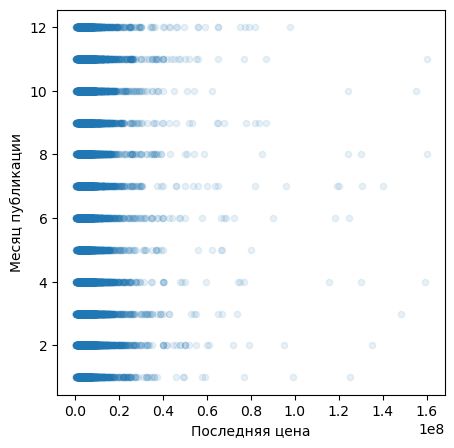

In [87]:
data_new.plot(x='last_price', y='publication_month', kind='scatter', alpha=0.1, figsize=(5, 5))
plt.xlabel('Последняя цена')
plt.ylabel('Месяц публикации')
plt.show()

Самая высокая средняя цена за квартиру зафиксирована в апреле, а самая низкая в июне месяце. В сентябре и ноябре цена также более высокая, чем в оставшихся месяцах. Следовательно, месяц публикации влияет на стоимость жилья, так как в разные месяцы средняя стоимость жилья варируется.

In [88]:
data_pivot_price = data_new.pivot_table(index='publication_year', values=['last_price', 'total_area',
                                                                    'living_area', 'kitchen_area', 'rooms',
                                                                    'day_of_week', 'publication_month'],
                                        aggfunc='median')
data_pivot_price = data_pivot_price.reset_index()
data_pivot_price.columns = ['Год публикации', 'День публикации', 'Площадь кухни', 'Стоимость жилья', 'Жилая площадь',
                            'Месяц публикации', 'Кол-во комнат', 'Площадь жилья']
data_pivot_price.sort_values(by='Год публикации', ascending=False)
data_pivot_price

,Год публикации,День публикации,Площадь кухни,Стоимость жилья,Жилая площадь,Месяц публикации,Кол-во комнат,Площадь жилья
0,2014,2,12.0,7640000,43.100000,12,3,76.18
1,2015,2,10.0,5300000,34.000000,8,2,60.00
2,2016,2,9.0,4500000,30.900001,5,2,53.00
3,2017,3,9.0,4500000,30.000000,8,2,51.70
4,2018,3,9.0,4550000,29.700000,7,2,50.50
5,2019,2,8.8,5045000,30.000000,3,2,51.70


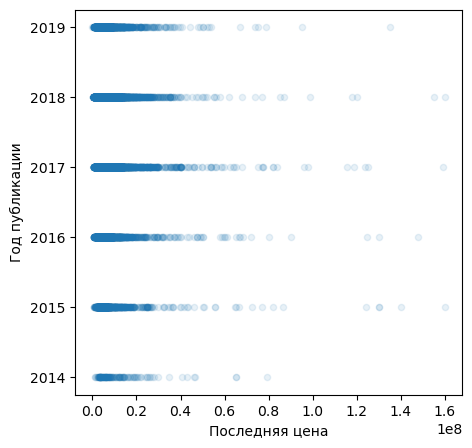

In [89]:
data_new.plot(x='last_price', y='publication_year', kind='scatter', alpha=0.1, figsize=(5, 5))
plt.xlabel('Последняя цена')
plt.ylabel('Год публикации')
plt.show()

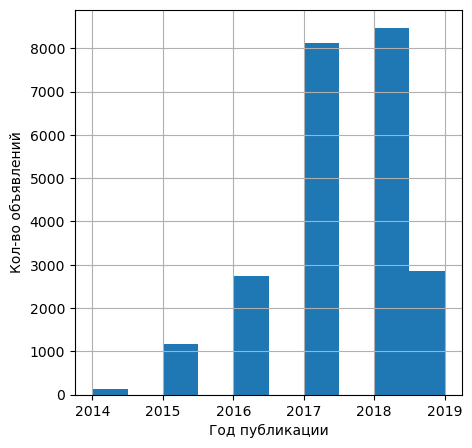

In [90]:
hist_build('publication_year', 'Год публикации', 'Кол-во объявлений', 10)

Год не влияет на стоимость жилья, так как в годах с наибольшим количеством публикаций цена на квартиру примерно одинаковая.

На графиках видно, что стоимость квартиры зависит прямо пропорционально от общей площади: чем больше общая площадь, тем выше стоимость. Также можно сказать, что из всех показателей жилая площадь квартиры тоже влияет на стоимость. Помимо площадей, на стоимость влияет тип этажа, на котором расположена квартира и количество комнат в квартире.


In [91]:
#Цена квадратного метра средняя по населенным пунктом
ten_frequent_location = data['locality_name'].value_counts().nlargest(10)
ten_frequent_location_name_list = ten_frequent_location.index

data_pivot_locality = data.pivot_table(index='locality_name', values='price_of_one_metre',
                                               aggfunc=['median', 'count'])
data_pivot_locality.columns = data_pivot_locality.columns.map('_'.join).str.strip('_')
data_pivot_locality = data_pivot_locality.reset_index()
data_pivot_locality_top = data_pivot_locality.query('locality_name in @ten_frequent_location_name_list') 
data_pivot_locality_top.columns = ['Населенный пункт', 'Средняя цена за квадратный метр', 'Количество объявлений']
data_pivot_locality_top.sort_values(by='Средняя цена за квадратный метр', ascending=False)

,Населенный пункт,Средняя цена за квадратный метр,Количество объявлений
31,Санкт-Петербург,104705.880,15579
30,Пушкин,100000.000,367
17,Кудрово,95555.315,470
214,поселок Парголово,91642.860,327
207,поселок Мурино,86059.295,552
266,поселок Шушары,76829.270,439
13,Колпино,74722.220,337
6,Гатчина,67796.610,307
3,Всеволожск,65789.470,398
4,Выборг,58158.320,237


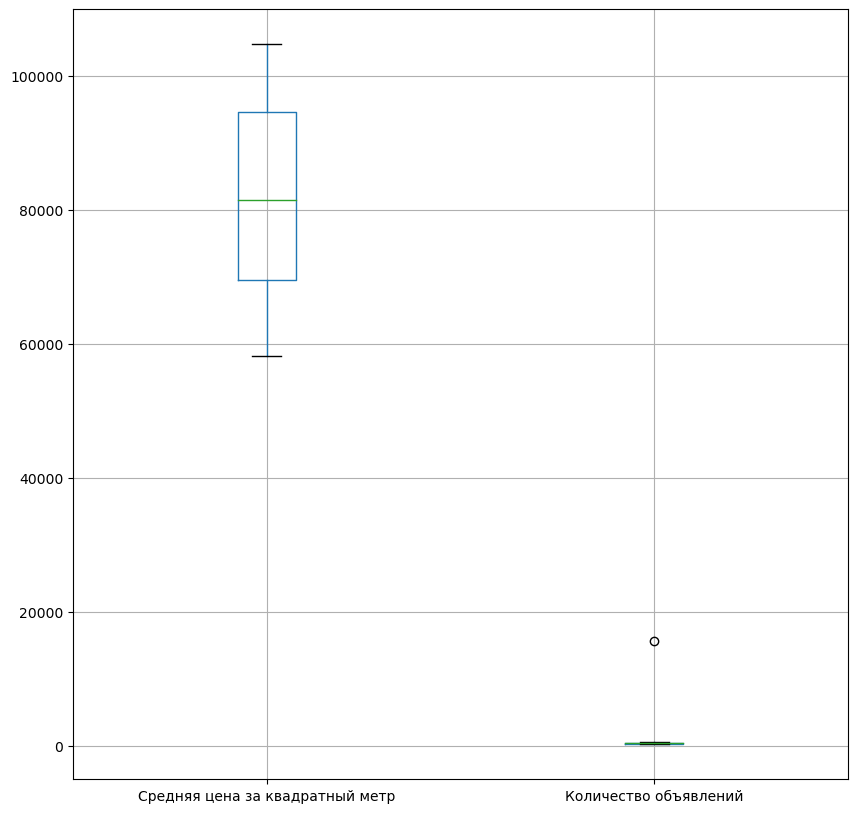

In [92]:
data_pivot_locality_top.boxplot(figsize=(10, 10), grid=True)
plt.show()

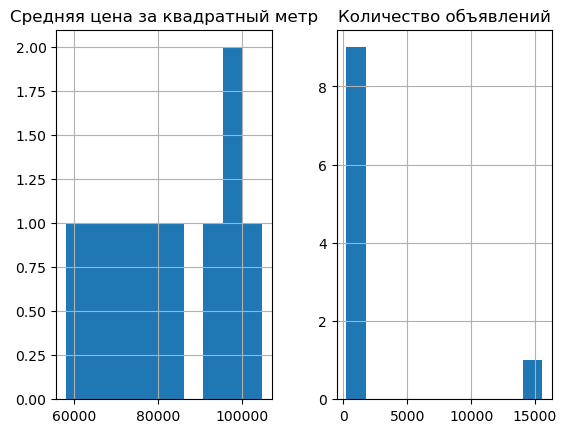

In [93]:
data_pivot_locality_top.hist()
plt.show()

В сводной таблице представлены топ 10 населенных пунктов с наибольшим количеством объявлений. Среди них самая высокая средняя стоимость за квадрытный метр в Санкт-Петербурге, а самая низкая - в Киришах. По диаграмме распределения видно что выбивающаяся точка среди значений и есть объявления из Санкт-Петербурга, так как они кратно превосходят количества объявлений в других городах.

Исходя из этого сделаем вывод, что на образование цены влияет населенный пункт, в котором продается квартира.


In [94]:
data_locality_center = data.query('locality_name == "Санкт-Петербург"')
data_locality_center['last_price']
data_pivot_locality_center = data_locality_center.pivot_table(index='city_center_near_km',
                                                      values='last_price', aggfunc='median')
data_pivot_locality_center = data_pivot_locality_center.reset_index()
data_pivot_locality_center.groupby('city_center_near_km').agg({'last_price':'median'})
data_pivot_locality_center.columns = ['Расстояние до центра', 'Стоимость жилья']
data_pivot_locality_center.sort_values(by='Расстояние до центра', ascending=True)

,Расстояние до центра,Стоимость жилья
0,0.0,13900000
1,1.0,11225000
2,2.0,10000000
3,3.0,8400000
4,4.0,9190000
5,5.0,9343000
6,6.0,8721680
7,7.0,7795000
8,8.0,7400000
9,9.0,5300000


По данным в смежной таблице видим, что чем меньше расстояние до центра, тем выше стоимость. Построим график, чтобы в этом убедиться.

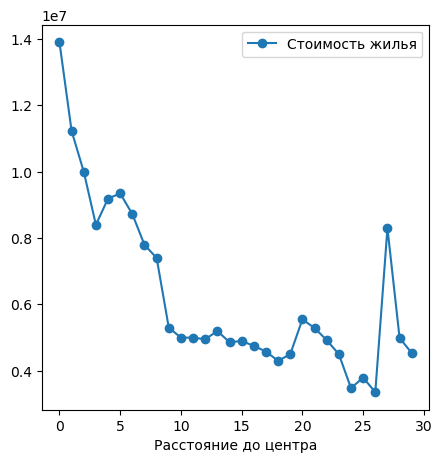

In [95]:
data_pivot_locality_center.plot(x='Расстояние до центра', y='Стоимость жилья', style='o-', figsize=(5, 5))
plt.show()

На графике наблюдаем линейную зависимость, чем дальше квартира от центра, тем ниже ее стоимость. Исходя из этого можем сделать вывод, что расстояние до центра города влияет на стоимость квартиры.

### Общий вывод

В данном проекте был проведен исследовательский анализ, который помог установить: какие параметры влияют на цену объектов больше всего.

На этапе предобработки данных были выявлены столбцы, содержащие пропуски: наименование населенного пункта, в столбцах высоты потолков, жилой площади, площади кухни, является ли квартира апартаментами, количество балконов, а также расстояния от населенных пунктов до ближайших мест проведения досуга (парки, пруды) и аэропорта.

Часть таких пропусков возникли по причине того, что пользователь сам не внес какие-то данные, некоторые пропуски возникли по причине недостатка информации так как зависили от значений в других столбцах, также возможно, что часть мест проведения досуга вообще отсутствовала в населенных пунктах за счет в соответствующих столбцах тоже возникли пропуски.

Помимо этого были выявлены и устранены несоответствия типов данных. Некорректные типы данных были заменены на более подходящие.

Была произведена обработка неявных дубликатов в столбце с названиями населенных пунктов.

Во многих столбцах таблицы были выявлены и устранены аномальные значения, которые могли бы помешать проведению анализа.

В таблицу были добавлены новые столбцы, необходимые для более точного анализа: цена одного квадратного метра квартиры, день, месяц и год публикации объявления, тип этажа квартиры (первый, последний, другой), расстояние до центра города.

Были построены сводные таблицы и графики зависимости общей стоимости квартиры от следующих параметров:
- Общая пощадь жилья;
- Жилая площадь;
- Площадь кужни;
- Количество комнат в квартире;
- Тип этажа;
- День публикации объявления;
- Месяц публикации объявления;
- Год публикации объявления.

При анализе было выявлено что на цену квартиры влияет общая площадь квартиры, жилая площадь, этаж, количество комнат, день и месяц публикации. 

Далее была сделана сводная таблица по 10 населенным пунктам, которые имеют наибольшее количество объявлений. В данной таблице содержится следующая информация: населенный пункт, средняя цена за квадратный метр, количество объявлений. Среди них самая высокая средняя стоимость за квадратный метр была в Санкт-Петербурге (в нем же было и самое большое количество объявлений), а самая наименьшая стоимость была в Киришах (в этом населенном пункте было одно из наименьших количеств объявлений). Можно сделать вывод что на стоимость квартиры влияет населенный пункт, в котором она расположена.

Была сделана сводная таблица по городу Санкт-Петербургу, в ней содержится информация о расстоянии до центра города, стоимость жилья и стоимость 1 километра до центра. Также был построен график, показывающий зависимость стоимости жилья от расстояния до центра города. По данным таблицы и графику видно, что чем меньше расстояние расстояние до центра, тем выше стоимость квартиры. Следовательно, на стоимость квартиры влияет расстояние до центра города.

Обобщим все вышеперчисленные выводы и выпишем по пунктам, какие параметры влияют на стоимость жилья:
- Общая площадь жилья и жилая площадь;
- Тип этажа, на котором расположена квартира;
- Количество комнат;
- День и месяц публикации объявления;
- Населенный пункт, в котором расположена квартира;
- Расстояние до центра города.